## Importing libraries

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

C:\Users\Yaqmu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Yaqmu\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/marketing-funnel-olist")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Yaqmu\.cache\kagglehub\datasets\olistbr\marketing-funnel-olist\versions\2


In [7]:
##Brazilian E-Commerce Public Dataset by Olist
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

##Marketing Funnel by Olist
closed_deals = pd.read_csv('olist_closed_deals_dataset.csv')
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

## EDA

### Customers Table

In [8]:
#customers table 1

In [9]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [10]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [11]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [12]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
#Display total number of nulll values as %
customers.isnull().mean().sort_values(ascending=False) *100

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

### Orders Table

In [14]:
#orders table 2

In [15]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
orders.isnull().sum().sort_values(ascending=False) 

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

In [17]:
orders.isnull().mean().sort_values(ascending=False) *100

order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
order_id                         0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
order_estimated_delivery_date    0.000000
dtype: float64

In [18]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [19]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

In [20]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [21]:
orders['order_status'].unique ()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### Order Items Table 

In [22]:
#order_items table 5

In [23]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [24]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [25]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
#Display total number of nulll values as %
order_items.isnull().mean().sort_values(ascending=False) *100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [27]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [28]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

### Order Payments table 

In [29]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
#Display total number of nulll values as %
order_payments.isnull().mean().sort_values(ascending=False) *100

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [31]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [32]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [33]:
order_payments['order_id'].nunique()

99440

In [34]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [35]:
order_payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [36]:
order_payments['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

### Order reviews Table

In [37]:
# Check missing values in each column
order_reviews.isnull().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [38]:
#Display total number of nulll values as %
order_reviews.isnull().mean().sort_values(ascending=False) *100

review_comment_title       88.341530
review_comment_message     58.702532
review_id                   0.000000
review_score                0.000000
order_id                    0.000000
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [39]:
#Display total number of nulll values as %
order_reviews.isnull().mean().sort_values(ascending=False) *100

review_comment_title       88.341530
review_comment_message     58.702532
review_id                   0.000000
review_score                0.000000
order_id                    0.000000
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [40]:
#check duplicate
order_reviews.duplicated().sum()

np.int64(0)

In [41]:
#check data types
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [42]:
#change data types
to_date=['review_creation_date', 'review_answer_timestamp']
order_reviews[to_date] = order_reviews[to_date].apply(pd.to_datetime)

In [43]:
#check data types
order_reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

### Products Table

In [44]:
# Check missing values in each column
products.isnull().sum().sort_values(ascending=False)

product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

In [45]:
#Display total number of nulll values as %
products.isnull().mean().sort_values(ascending=False) *100

product_category_name         1.851234
product_description_lenght    1.851234
product_name_lenght           1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_height_cm             0.006070
product_length_cm             0.006070
product_width_cm              0.006070
product_id                    0.000000
dtype: float64

In [46]:
#check duplicate
products.duplicated().sum()

np.int64(0)

In [47]:
#check data types
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [48]:
to_int=['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products[to_int]=products[to_int].astype('Int64')

In [49]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght             Int64
product_description_lenght      Int64
product_photos_qty              Int64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

### Product Category Table

In [50]:
# Check missing values in each column
product_category.isnull().sum().sort_values(ascending=False)

product_category_name            0
product_category_name_english    0
dtype: int64

In [51]:
#Display total number of nulll values as %
product_category.isnull().mean().sort_values(ascending=False) *100

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

In [52]:
#check duplicate
product_category.duplicated().sum()

np.int64(0)

In [53]:
#check data types
product_category.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

### Geolocation Table

In [54]:
#Display total number of nulll values as %
geolocation.isnull().mean().sort_values(ascending=False) *100

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [55]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

### Sellers Table

In [56]:
#Display total number of nulll values as %
sellers.isnull().mean().sort_values(ascending=False) *100

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [57]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

### Closed Deals Table 

In [58]:
#Display total number of nulll values as %
closed_deals.isnull().mean().sort_values(ascending=False) *100

has_company                      92.517815
has_gtin                         92.399050
average_stock                    92.161520
declared_product_catalog_size    91.805226
lead_behaviour_profile           21.021378
business_type                     1.187648
lead_type                         0.712589
business_segment                  0.118765
won_date                          0.000000
seller_id                         0.000000
mql_id                            0.000000
sr_id                             0.000000
sdr_id                            0.000000
declared_monthly_revenue          0.000000
dtype: float64

In [59]:
closed_deals.dtypes

mql_id                            object
seller_id                         object
sdr_id                            object
sr_id                             object
won_date                          object
business_segment                  object
lead_type                         object
lead_behaviour_profile            object
has_company                       object
has_gtin                          object
average_stock                     object
business_type                     object
declared_product_catalog_size    float64
declared_monthly_revenue         float64
dtype: object

In [60]:
closed_deals['won_date']=pd.to_datetime(closed_deals['won_date'])
closed_deals.dtypes

mql_id                                   object
seller_id                                object
sdr_id                                   object
sr_id                                    object
won_date                         datetime64[ns]
business_segment                         object
lead_type                                object
lead_behaviour_profile                   object
has_company                              object
has_gtin                                 object
average_stock                            object
business_type                            object
declared_product_catalog_size           float64
declared_monthly_revenue                float64
dtype: object

### MQL Table

In [61]:
#Display total number of nulll values as %
mql.isnull().mean().sort_values(ascending=False) *100

origin                0.75
mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
dtype: float64

In [62]:
mql.dtypes

mql_id                object
first_contact_date    object
landing_page_id       object
origin                object
dtype: object

In [63]:
mql['first_contact_date']=pd.to_datetime(mql['first_contact_date'])
mql.dtypes

mql_id                        object
first_contact_date    datetime64[ns]
landing_page_id               object
origin                        object
dtype: object

## Analysis 

### Products Table

In [64]:
#adding product_volume_cm3 column

In [65]:
products['product_volume_cm3']=products['product_height_cm']*products['product_width_cm']*products['product_length_cm']
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,4420.0


### orders

In [66]:
orders['carrier_to_customer']= orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28


In [67]:
orders['delivery_accuracy_days']=  orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']
orders.sort_values(by= 'delivery_accuracy_days', ascending = False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,delivery_accuracy_days
40094,0607f0efea4b566f1eb8f7d3c2397320,a5fbb6579eacbeb02752a143bfe82405,delivered,2018-03-06 09:47:07,2018-03-06 09:55:47,2018-03-07 21:33:39,2018-03-09 23:36:47,2018-08-03,2 days 02:03:08,146 days 00:23:13
15791,c72727d29cde4cf870d569bf65edabfd,964253ff0e4e08180064764a450e521f,delivered,2017-02-07 18:01:15,2017-02-09 02:50:07,2017-02-10 05:32:55,2017-02-14 14:27:45,2017-07-04,4 days 08:54:50,139 days 09:32:15
57160,eec7f369423b033e549c02f3c5381205,32cef4bdd6bfa50612d81dc77a93b131,delivered,2018-02-06 20:44:56,2018-02-08 10:10:31,2018-02-15 20:42:12,2018-02-27 16:35:43,2018-07-12,11 days 19:53:31,134 days 07:24:17
86444,c2bb89b5c1dd978d507284be78a04cb2,6357fffb5704244d552615bbfcea1442,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,11 days 11:32:26,123 days 10:24:06
67488,40dc2ba6f322a17626aac6244332828c,6210a37f9d6a265a4f3fbe2c21672a00,delivered,2017-10-05 21:39:05,2017-10-05 21:49:21,2017-10-09 12:13:58,2017-10-13 13:49:07,2018-01-30,4 days 01:35:09,108 days 10:10:53
...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,NaT
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,NaT,NaT
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,NaT,NaT
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaT,NaT


In [68]:
orders['seller_to_carrier']= orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,delivery_accuracy_days,seller_to_carrier
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,7 days 02:34:47,2 days 08:47:45
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,5 days 08:32:15,0 days 11:06:33
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,17 days 05:53:31,0 days 04:54:37
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,12 days 23:31:18,3 days 17:54:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,9 days 05:42:58,0 days 21:26:05


In [69]:
orders['full_delivery_time']= orders['order_delivered_customer_date'] - orders['order_approved_at']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,delivery_accuracy_days,seller_to_carrier,full_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,7 days 02:34:47,2 days 08:47:45,8 days 10:17:58
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,5 days 08:32:15,0 days 11:06:33,12 days 12:03:18
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,17 days 05:53:31,0 days 04:54:37,9 days 09:11:06
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,12 days 23:31:18,3 days 17:54:00,13 days 04:42:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,9 days 05:42:58,0 days 21:26:05,2 days 19:56:33


In [70]:
orders=orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'carrier_to_customer', 'seller_to_carrier',
       'full_delivery_time','delivery_accuracy_days']]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58


### Creating Deliverd orders DataFrame

In [71]:
delivered_orders=orders[orders['order_status']=='delivered']
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7 days 03:49:58,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20 days 18:15:14,1 days 10:12:05,22 days 04:27:19,1 days 06:22:04
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23 days 14:31:51,1 days 05:48:10,24 days 20:20:01,5 days 12:35:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13 days 07:57:51,3 days 17:58:42,17 days 01:56:33,20 days 00:27:06


In [72]:
delivered_orders.isnull().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.014511
order_delivered_carrier_date     0.002073
order_delivered_customer_date    0.008292
order_estimated_delivery_date    0.000000
carrier_to_customer              0.009329
seller_to_carrier                0.016584
full_delivery_time               0.022803
delivery_accuracy_days           0.008292
dtype: float64

In [73]:
delivered_orders[delivered_orders.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaT,2 days 00:15:43,NaT,NaT
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaT,5 days 00:45:55,NaT,NaT
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,NaT,1 days 20:41:48,NaT,NaT
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaT,1 days 15:41:46,NaT,NaT
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaT,1 days 11:58:06,NaT,NaT
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,NaT,NaT,NaT,NaT
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaT,4 days 01:33:21,NaT,NaT
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,NaT,6 days 02:56:30,NaT,NaT


In [74]:
delivered_orders=delivered_orders[delivered_orders['order_id'] != '2d858f451373b04fb5c984a1cc2defaf']
delivered_orders[delivered_orders.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaT,2 days 00:15:43,NaT,NaT
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaT,5 days 00:45:55,NaT,NaT
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,NaT,1 days 20:41:48,NaT,NaT
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaT,1 days 15:41:46,NaT,NaT
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaT,1 days 11:58:06,NaT,NaT
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaT,4 days 01:33:21,NaT,NaT
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,NaT,6 days 02:56:30,NaT,NaT


In [75]:
def delivery_category(value):
    if value == pd.Timedelta(days=0):
        return 'On time'
    elif pd.Timedelta(days=-3) < value < pd.Timedelta(days=3):
        return 'Within expected range'
    elif value > pd.Timedelta(days=3):
        return 'Underestimated'
    else:
        return 'Overestimated'

delivered_orders['delivery_category'] = delivered_orders['delivery_accuracy_days'].apply(delivery_category)
delivered_orders


C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1513638499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_category'] = delivered_orders['delivery_accuracy_days'].apply(delivery_category)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47,Underestimated
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15,Underestimated
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31,Underestimated
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18,Underestimated
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58,Underestimated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7 days 03:49:58,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,Underestimated
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20 days 18:15:14,1 days 10:12:05,22 days 04:27:19,1 days 06:22:04,Within expected range
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23 days 14:31:51,1 days 05:48:10,24 days 20:20:01,5 days 12:35:43,Underestimated
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13 days 07:57:51,3 days 17:58:42,17 days 01:56:33,20 days 00:27:06,Underestimated


In [76]:
fright_by_weight = pd.merge(order_items, products, on='product_id', how='inner')

fright_by_weight

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56,239,2,30000.0,50.0,30.0,40.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59,695,2,3050.0,33.0,13.0,33.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42,480,1,200.0,16.0,10.0,15.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59,409,1,3750.0,35.0,40.0,30.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43,1002,3,10150.0,89.0,15.0,40.0,53400.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31,232,1,8950.0,45.0,26.0,38.0,44460.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43,869,1,967.0,21.0,24.0,19.0,9576.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56,1306,1,100.0,20.0,20.0,20.0,8000.0


<Axes: xlabel='freight_value'>

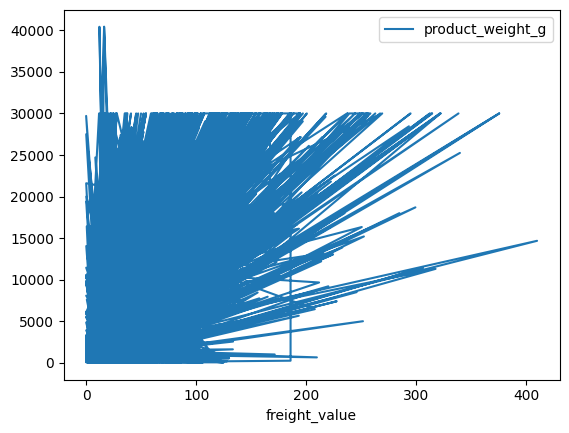

In [77]:
fright_by_weight.plot(x='freight_value',y='product_weight_g',kind='line')

In [78]:
fright_by_weight['freight_value'].corr(fright_by_weight['product_weight_g'])

np.float64(0.6104202350972822)

In [79]:
fright_by_weight['freight_value'].corr(fright_by_weight['product_volume_cm3'])

np.float64(0.5872700711964554)

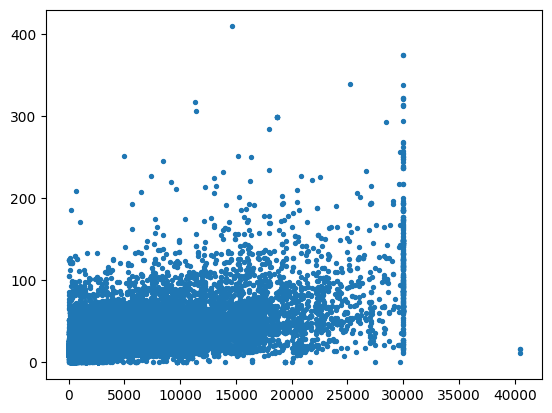

In [80]:
plt.scatter(fright_by_weight['product_weight_g'],fright_by_weight['freight_value'],s=8)

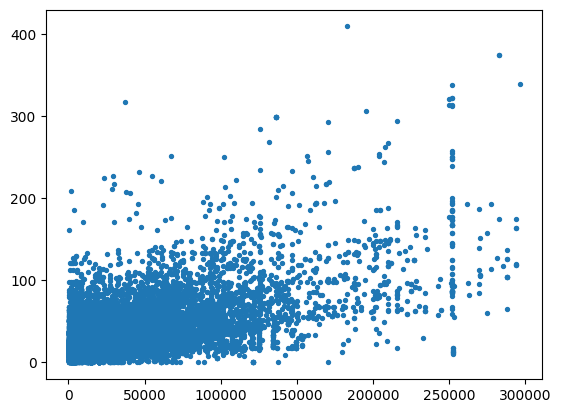

In [81]:
plt.scatter(fright_by_weight['product_volume_cm3'],fright_by_weight['freight_value'],s=8)

## delivered orders reviews

In [82]:
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47,Underestimated
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15,Underestimated
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31,Underestimated
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18,Underestimated
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58,Underestimated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7 days 03:49:58,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,Underestimated
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20 days 18:15:14,1 days 10:12:05,22 days 04:27:19,1 days 06:22:04,Within expected range
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23 days 14:31:51,1 days 05:48:10,24 days 20:20:01,5 days 12:35:43,Underestimated
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13 days 07:57:51,3 days 17:58:42,17 days 01:56:33,20 days 00:27:06,Underestimated


In [83]:
delivered_orders['full_delivery_days'] = delivered_orders['full_delivery_time'].dt.total_seconds().div(86400).round()
delivered_orders

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1495368334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['full_delivery_days'] = delivered_orders['full_delivery_time'].dt.total_seconds().div(86400).round()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47,Underestimated,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15,Underestimated,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31,Underestimated,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18,Underestimated,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58,Underestimated,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7 days 03:49:58,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,Underestimated,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20 days 18:15:14,1 days 10:12:05,22 days 04:27:19,1 days 06:22:04,Within expected range,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23 days 14:31:51,1 days 05:48:10,24 days 20:20:01,5 days 12:35:43,Underestimated,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13 days 07:57:51,3 days 17:58:42,17 days 01:56:33,20 days 00:27:06,Underestimated,17.0


In [84]:
delivered_orders[delivered_orders['full_delivery_days'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaT,2 days 00:15:43,NaT,NaT,Overestimated,NaN
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,6 days 01:20:46,NaT,NaT,15 days 10:34:27,Underestimated,NaN
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,7 days 01:03:14,NaT,NaT,18 days 13:54:54,Underestimated,NaN
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,6 days 15:42:13,NaT,NaT,15 days 15:52:22,Underestimated,NaN
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaT,5 days 00:45:55,NaT,NaT,Overestimated,NaN
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,14 days 20:05:37,NaT,NaT,21 days 16:31:13,Underestimated,NaN
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,7 days 23:46:08,NaT,NaT,17 days 12:50:41,Underestimated,NaN
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,5 days 03:19:11,NaT,NaT,29 days 05:43:59,Underestimated,NaN
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,7 days 00:30:10,NaT,NaT,24 days 20:18:02,Underestimated,NaN
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,7 days 08:51:47,NaT,NaT,19 days 07:44:37,Underestimated,NaN


In [85]:
delivered_orders.dropna(subset=['order_approved_at'],inplace=True)
delivered_orders.isnull().mean()*100

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1967369765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders.dropna(subset=['order_approved_at'],inplace=True)


order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000000
order_delivered_carrier_date     0.001037
order_delivered_customer_date    0.007257
order_estimated_delivery_date    0.000000
carrier_to_customer              0.008293
seller_to_carrier                0.001037
full_delivery_time               0.007257
delivery_accuracy_days           0.007257
delivery_category                0.000000
full_delivery_days               0.007257
dtype: float64

In [86]:
delivered_orders.to_csv('delivered_orders.csv')

In [87]:
# Merge delivered orders with their reviews
delivered_reviews = pd.merge(
    delivered_orders,
    order_reviews,
    on='order_id',
    how='inner'   # inner join keeps only delivered orders with review
)
delivered_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2 days 08:47:45,8 days 10:17:58,7 days 02:34:47,Underestimated,8.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,0 days 11:06:33,12 days 12:03:18,5 days 08:32:15,Underestimated,13.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,0 days 04:54:37,9 days 09:11:06,17 days 05:53:31,Underestimated,9.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,3 days 17:54:00,13 days 04:42:43,12 days 23:31:18,Underestimated,13.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,0 days 21:26:05,2 days 19:56:33,9 days 05:42:58,Underestimated,3.0,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96341,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7 days 03:49:58,1 days 01:23:58,8 days 05:13:56,10 days 08:51:59,Underestimated,8.0,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22,2017-03-23 11:02:08
96342,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20 days 18:15:14,1 days 10:12:05,22 days 04:27:19,1 days 06:22:04,Within expected range,22.0,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
96343,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23 days 14:31:51,1 days 05:48:10,24 days 20:20:01,5 days 12:35:43,Underestimated,25.0,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57
96344,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13 days 07:57:51,3 days 17:58:42,17 days 01:56:33,20 days 00:27:06,Underestimated,17.0,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56


In [88]:
# Define keyword categories for review classification of delivered reviews
delivered_categories = {
    'condition': [
        'quality', 'material', 'fabric', 'build', 'construction', 'finish',
        'durable', 'durability', 'cheap', 'flimsy', 'fragile', 'sturdy',
        'solid', 'well-made', 'poor', 'feels', 'looks', 'appearance',
        'finishing', 'craftsmanship', 'workmanship', 'plastic', 'metal',
        'wood', 'texture', 'leather'
    ],
    'seller': [
        'seller', 'vendor', 'store', 'shop', 'merchant', 'retailer',
        'communication', 'responsive', 'unresponsive', 'professional',
        'reliable', 'trustworthy', 'recommend', 'avoid', 'excellent',
        'poor', 'packaging', 'packed', 'presentation', 'care',
        'attention', 'service'
    ],
    'value': [
        'worth', 'value', 'price', 'priced', 'expensive', 'cheap',
        'affordable', 'overpriced', 'bargain', 'deal', 'money', 'cost',
        'payment', 'quality', 'good', 'poor', 'rip-off'
    ],
    'accuracy': [
        'accurate', 'description', 'photos', 'pictures', 'listing',
        'advertised', 'matches', 'exactly', 'different', 'same',
        'identical', 'true', 'color', 'size', 'dimensions',
        'measurements', 'specifications'
    ],
    'logistics': [
        'post', 'carrier', 'courier', 'transport', 'logistics', 'address',
        'location', 'postal', 'mail', 'package', 'parcel', 'shipment', 'tracking',  'secure', 'packaging', 'packed'
    ],
   'shipping satisfaction': [
    'fast', 'quick', 'early', 'prompt', 'on time', 'ahead', 'speedy',
    'efficient', 'timely', 'excellent shipping', 'great delivery',
    'perfect timing', 'arrived quickly', 'shipped fast'
    ],
  'shipping delays': [
        'delay', 'late', 'waiting', 'pending', 'delivered', 'arrive',
        'awaiting', 'long', 'slow', 'deadline', 'delivery', 'shipping',
        'estimated', 'date', 'arrival', 'expected', 'promised', 'time'
    ],
    'fast shipping': [
        'fast', 'quick', 'early', 'prompt', 'speedy', 'efficient',
        'timely', 'ahead', 'quickly', 'rapid', 'swift'
    ],
    'performance': [
        'works', 'working', 'performance', 'function', 'functional',
        'easy', 'difficult', 'complicated', 'simple', 'effective',
        'efficient', 'reliable', 'broke', 'broken', 'stopped'
    ],
    'damage': [
        'damage', 'broken', 'defect', 'defective', 'problem', 'issue',
        'working', 'faulty', 'flawed', 'cracked', 'scratched',
        'torn', 'ripped', 'bent'
    ],
    'wrong': [
        'wrong', 'incorrect', 'different', 'mistake', 'mistaken',
        'size', 'color', 'item', 'model', 'matching'
    ],
    'billing': [
        'overcharge', 'overcharged', 'double', 'billed', 'incorrect',
        'amount', 'billing', 'financial', 'transaction', 'bank'
    ]
}


In [89]:
def categorize_review(row, category_dict):
    review_categories = []
    row_comment = []
    
    # Convert row to string and split into words
    text = str(row).lower()
    row_comment = text.split()  # Split into individual words
    
    # Check each word against category keywords
    for word in row_comment:
        # Clean the word (remove punctuation)
        clean_word = word.strip('.,!?;:"()[]{}')
        
        for category, keywords in category_dict.items():
            if clean_word in keywords:
                if category not in review_categories:  # Avoid duplicates
                    review_categories.append(category)
    
    # If no categories found, return "other reason" as string
    if not review_categories:
        return 'other reason'
    
    # Return categories as comma-separated string instead of list
    return ', '.join(review_categories)

In [90]:
#lead the translated delivered reviews
english_delivered_reviews = pd.read_csv('english_translated_delivered_reviews.csv', encoding='latin1')

In [91]:
english_delivered_reviews

,order_id,review_score,English_review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv..."
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.
...,...,...,...
39061,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...
39062,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,..."
39063,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha."
39064,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.


In [92]:
# Apply the function for the delivered reviews
english_delivered_reviews['review_categories'] = english_delivered_reviews['English_review_comment_message'].apply(
    lambda x: categorize_review(x, delivered_categories)
)

english_delivered_reviews

,order_id,review_score,English_review_comment_message,review_categories
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv...",value
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.,value
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...,"accuracy, shipping delays"
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.,"shipping delays, seller"
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.,other reason
...,...,...,...,...
39061,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...,shipping delays
39062,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,...",other reason
39063,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha.",damage
39064,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.,"shipping delays, shipping satisfaction, fast s..."


In [93]:
delivered_orders= pd.merge(
    english_delivered_reviews,
    delivered_reviews,  
    on='order_id',
    how='inner'
)
delivered_orders

,order_id,review_score_x,English_review_comment_message,review_categories,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,review_id,review_score_y,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv...",value,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,8 days 10:17:58,7 days 02:34:47,Underestimated,8.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.,value,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,12 days 12:03:18,5 days 08:32:15,Underestimated,13.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...,"accuracy, shipping delays",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,...,13 days 04:42:43,12 days 23:31:18,Underestimated,13.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.,"shipping delays, seller",494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,...,12 days 15:28:13,8 days 12:41:29,Underestimated,13.0,15898b543726a832d4137fbef5d1d00e,1,NaN,Aguardando retorno da loja,2017-05-30,2017-05-30 23:13:47
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.,other reason,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,...,11 days 08:25:39,8 days 00:23:34,Underestimated,11.0,8f39f09c22b1ceb6e3eb178d8e50bb8a,4,NaN,Gostei do produto,2018-03-13,2018-03-14 10:36:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...,shipping delays,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,...,14 days 02:24:33,11 days 06:02:38,Underestimated,14.0,ede62474f1618961be12678f362dca4a,5,NaN,Otimo comprar por este site as mercadorias che...,2017-11-11,2017-11-15 09:54:14
39433,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,...",other reason,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,...,37 days 05:35:22,-9 days +08:14:46,Overestimated,37.0,8ea780895f362ce949029f95b7181ff0,1,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19,2018-01-21 02:51:39
39434,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha.",damage,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,22 days 04:27:19,1 days 06:22:04,Within expected range,22.0,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01
39435,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.,"shipping delays, shipping satisfaction, fast s...",1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,24 days 20:20:01,5 days 12:35:43,Underestimated,25.0,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57


In [94]:
# Define delivered categories
categories = [
    "condition",
    "seller",
    "value",
    "accuracy",
    "logistics",
    "shipping delays",
    "fast shipping",
    "performance",
    "damage",
    "wrong",
    "billing"
]

# Create binary columns
for i in categories:
    delivered_orders[i] = delivered_orders['review_categories'].str.contains(i, case=False, na=False).astype(int)

delivered_orders

,order_id,review_score_x,English_review_comment_message,review_categories,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller,value,accuracy,logistics,shipping delays,fast shipping,performance,damage,wrong,billing
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv...",value,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,0,1,0,0,0,0,0,0,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.,value,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,0,1,0,0,0,0,0,0,0,0
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...,"accuracy, shipping delays",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,...,0,0,1,0,1,0,0,0,0,0
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.,"shipping delays, seller",494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,...,1,0,0,0,1,0,0,0,0,0
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.,other reason,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...,shipping delays,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,...,0,0,0,0,1,0,0,0,0,0
39433,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,...",other reason,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,...,0,0,0,0,0,0,0,0,0,0
39434,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha.",damage,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,0,0,0,0,0,0,0,1,0,0
39435,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.,"shipping delays, shipping satisfaction, fast s...",1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,0,0,0,0,1,1,0,0,0,0


## canceled orders reviews

In [95]:
canceled_orders=orders[orders['order_status']=='canceled']
canceled_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,NaT,NaT,NaT,NaT
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,NaT,NaT
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,NaT,1 days 07:51:58,NaT,NaT
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaT,NaT,NaT,NaT
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,NaT,NaT,NaT,NaT
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaT,NaT,NaT,NaT
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27,NaT,NaT,NaT,NaT
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,NaT,NaT,NaT


In [96]:
# Merge canceled orders with their reviews
canceled_reviews = pd.merge(
    canceled_orders,
    order_reviews,
    on='order_id',
    how='inner'   
)
canceled_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,NaT,NaT,NaT,NaT,14d540de5632307e389e9416086fc978,1,NaN,NaN,2018-08-17,2018-08-19 13:51:01
1,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,NaT,NaT,f242ce44c6572a94907a446b8fda32c8,1,NaN,Olá!\r\nMinha queixa é a não entrega na residê...,2018-03-02,2018-03-05 01:28:24
2,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,NaT,NaT,105facb42b5b9147996f0b1b6fbf7b80,1,NaN,Holá!\r\nNão recebi o produto é nem um telefon...,2018-02-24,2018-02-27 00:13:54
3,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,NaT,1 days 07:51:58,NaT,NaT,15c8f3b3ff412d0f8d6b72053335fd0b,1,NaN,Não recebi o produto e também não tive reembolso,2018-02-25,2018-02-25 11:02:38
4,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaT,NaT,NaT,NaT,9c0d840dfe562debfa52a1792bd64bff,1,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28,2018-08-28 18:25:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,NaT,NaT,NaT,NaT,c950324a42c5796d06f569f77d8b2e88,1,NaN,NaN,2017-04-01,2017-04-01 10:24:03
605,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaT,NaT,NaT,NaT,68c3385b4bb41af5847346c3552ba744,2,Troca de produto.,Preciso trocar os copos pois vieram errados. O...,2018-08-04,2018-08-04 13:57:25
606,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27,NaT,NaT,NaT,NaT,da12d47f5616024c216d6a5ad19ec5ac,1,NaN,Após o produto faturado a loja enviou e-mail q...,2017-10-29,2017-10-29 12:49:13
607,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaT,NaT,NaT,NaT,16d3db296c46b4411dfc5f8bde882e6d,5,NaN,NaN,2018-07-24,2018-07-25 16:26:05


In [97]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# Load the Excel file
English_canceled_reviews = pd.read_excel('English_canceled_reviews.xlsx')

# Define keyword categories for review classification 
category_keywords = { 
    'shipping delays': [
        'delay', 'late', 'waiting', 'pending', 'delivered', 'arrive', 
        'awaiting', 'long', 'slow', 'deadline', 'delivery', 'shipping',
        'estimated', 'date', 'arrival', 'expected', 'promised', 'time'
    ],
    'cancellation refund': [
        'cancel', 'refund', 'money', 'chargeback', 'reimburse',
        'charge', 'payment', 'card', 'credit', 'billing', 'invoice',
        'canceled', 'cancellation', 'refunded', 'reimbursement'
    ],
    'product unavailable': [
        'stock', 'unavailable', 'available', 'lack', 'have', 'inventory',
        'discontinued', 'sold', 'backorder', 'esgotado', 'indisponível'
    ],
    'wrong product': [
        'wrong', 'incorrect', 'different', 'mistake', 'mistaken',
        'size', 'color', 'item', 'model', 'matching'
    ],
    'damaged product': [
        'damage', 'broken', 'defect', 'defective', 'problem', 'issue',
        'working', 'faulty', 'flawed', 'cracked', 'scratched',
        'torn', 'ripped', 'bent'
    ],
    'customer service': [
        'contact', 'call', 'email', 'response', 'respond', 'answer',
        'service', 'support', 'help', 'assistance', 'representative',
        'ignored', 'reply', 'team', 'helpline'
    ],
    'logistics issues': [
        'post', 'carrier', 'courier', 'shipping', 'delivery',
        'transport', 'logistics', 'address', 'location', 'postal',
        'mail', 'package', 'parcel', 'shipment', 'tracking'
    ],
    'billing issues': [
        'overcharge', 'overcharged', 'double', 'billed', 'incorrect',
        'amount', 'billing', 'financial', 'transaction', 'bank'
    ]
}

# Apply the function for the canceled reviews
English_canceled_reviews['review_categories'] = English_canceled_reviews['English _review_comment_message'].apply(
    lambda x: categorize_review(x, category_keywords)
)

English_canceled_reviews


,order_id,review_score,review_comment_title,English _review_comment_message,review_categories
0,714fb133a6730ab81fa1d3c1b2007291,1,NaN,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome..."
1,714fb133a6730ab81fa1d3c1b2007291,1,NaN,Hello! I did not receive the product nor any p...,customer service
2,3a129877493c8189c59c60eb71d97c29,1,NaN,I did not receive the product and also did not...,cancellation refund
3,0966b61e30c4a07edbd7523f59b3f3e4,1,I did not receive the product,I bought the product and then they informed me...,"product unavailable, cancellation refund, cust..."
4,9021cf1919f615a121410790dcce848f,1,NaN,I did not receive it and I hope to receive it,other reason
...,...,...,...,...,...
311,9acc95f3652577fb8a5c8b1a7ee9bd96,1,NaN,I waited more than 30 days to give it as a gif...,cancellation refund
312,b41b68092121772821fcdd6f7fb1594c,1,NaN,I bought a bracelet from the site because it w...,"product unavailable, cancellation refund, ship..."
313,affcfd3067c168967157abe801a3c4ec,2,NaN,I am waiting for the product until today since...,shipping delays
314,2be6c8b958e16856397259974d4abee9,1,NaN,My product was not delivered it was scheduled...,"shipping delays, logistics issues, cancellatio..."


In [99]:
# Define shipping-related categories
shipping_related_categories = ['shipping delays', 'damaged product', 'logistics issues']

# Filter rows that have at least one shipping-related category
shipping_issues = English_canceled_reviews[
    English_canceled_reviews['review_categories'].fillna('').apply(
        lambda x: any(cat.strip() in x for cat in shipping_related_categories)
    )
]

shipping_issues

,order_id,review_score,review_comment_title,English _review_comment_message,review_categories
0,714fb133a6730ab81fa1d3c1b2007291,1,NaN,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome..."
5,a39d3db795a5cf4c8b6c9dd050f0d326,1,NaN,I bought the product and it was not delivered ...,"shipping delays, logistics issues, customer se..."
6,2eb5ba20812f78127f6243fa27fb40e5,1,NaN,Still waiting for order delivery. I need an ur...,"shipping delays, logistics issues"
8,e5fa5a7210941f7d56d0208e4e071d35,1,NaN,I bought two products from this partner store ...,"shipping delays, customer service"
9,8a9cce19aa49e055f2babb81d5a71c40,1,NaN,Purchase made on 03-02-2018. I am waiting for ...,shipping delays
...,...,...,...,...,...
308,167d05678f810589a854d30460ae62f0,1,NaN,Delay product not delivered!,shipping delays
310,7159096c5aa9be77f7f0c26c01ee9793,1,NaN,I need to know if there is a deadline to recei...,"shipping delays, cancellation refund"
312,b41b68092121772821fcdd6f7fb1594c,1,NaN,I bought a bracelet from the site because it w...,"product unavailable, cancellation refund, ship..."
313,affcfd3067c168967157abe801a3c4ec,2,NaN,I am waiting for the product until today since...,shipping delays


In [100]:
orders_with_shipping_issues = pd.merge(
    shipping_issues,
    orders,  
    on='order_id',
    how='inner'
)
orders_with_shipping_issues[['order_id', 'review_score', 'English _review_comment_message', 'review_categories', 'order_delivered_carrier_date', 'seller_to_carrier','carrier_to_customer','review_categories']] 

,order_id,review_score,English _review_comment_message,review_categories,order_delivered_carrier_date,seller_to_carrier,carrier_to_customer,review_categories
0,714fb133a6730ab81fa1d3c1b2007291,1,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome...",2018-01-29 22:33:25,3 days 00:34:46,NaT,"logistics issues, product unavailable, custome..."
1,a39d3db795a5cf4c8b6c9dd050f0d326,1,I bought the product and it was not delivered ...,"shipping delays, logistics issues, customer se...",NaT,NaT,NaT,"shipping delays, logistics issues, customer se..."
2,2eb5ba20812f78127f6243fa27fb40e5,1,Still waiting for order delivery. I need an ur...,"shipping delays, logistics issues",NaT,NaT,NaT,"shipping delays, logistics issues"
3,e5fa5a7210941f7d56d0208e4e071d35,1,I bought two products from this partner store ...,"shipping delays, customer service",NaT,NaT,NaT,"shipping delays, customer service"
4,8a9cce19aa49e055f2babb81d5a71c40,1,Purchase made on 03-02-2018. I am waiting for ...,shipping delays,2018-02-05 20:41:28,2 days 17:48:46,NaT,shipping delays
...,...,...,...,...,...,...,...,...
140,167d05678f810589a854d30460ae62f0,1,Delay product not delivered!,shipping delays,NaT,NaT,NaT,shipping delays
141,7159096c5aa9be77f7f0c26c01ee9793,1,I need to know if there is a deadline to recei...,"shipping delays, cancellation refund",NaT,NaT,NaT,"shipping delays, cancellation refund"
142,b41b68092121772821fcdd6f7fb1594c,1,I bought a bracelet from the site because it w...,"product unavailable, cancellation refund, ship...",NaT,NaT,NaT,"product unavailable, cancellation refund, ship..."
143,affcfd3067c168967157abe801a3c4ec,2,I am waiting for the product until today since...,shipping delays,2018-02-19 20:08:21,1 days 21:32:52,NaT,shipping delays


In [101]:
orders_with_shipping_issues

,order_id,review_score,review_comment_title,English _review_comment_message,review_categories,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
0,714fb133a6730ab81fa1d3c1b2007291,1,NaN,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome...",e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,NaT,NaT
1,a39d3db795a5cf4c8b6c9dd050f0d326,1,NaN,I bought the product and it was not delivered ...,"shipping delays, logistics issues, customer se...",ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30,NaT,NaT,NaT,NaT
2,2eb5ba20812f78127f6243fa27fb40e5,1,NaN,Still waiting for order delivery. I need an ur...,"shipping delays, logistics issues",d5420a7dc4c5c1f95b7912368419f59f,canceled,2017-05-29 18:10:06,2017-05-31 07:02:46,NaT,NaT,2017-06-20,NaT,NaT,NaT,NaT
3,e5fa5a7210941f7d56d0208e4e071d35,1,NaN,I bought two products from this partner store ...,"shipping delays, customer service",683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,NaT,NaT,NaT,NaT
4,8a9cce19aa49e055f2babb81d5a71c40,1,NaN,Purchase made on 03-02-2018. I am waiting for ...,shipping delays,f2676ef361959c938b35ecd32321adce,canceled,2018-02-01 10:04:20,2018-02-03 02:52:42,2018-02-05 20:41:28,NaT,2018-02-23,NaT,2 days 17:48:46,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,167d05678f810589a854d30460ae62f0,1,NaN,Delay product not delivered!,shipping delays,37ae23e3c8ce808a4ba0c0711706b956,canceled,2018-02-03 22:58:58,2018-02-03 23:10:27,NaT,NaT,2018-03-05,NaT,NaT,NaT,NaT
141,7159096c5aa9be77f7f0c26c01ee9793,1,NaN,I need to know if there is a deadline to recei...,"shipping delays, cancellation refund",d8f3aacf5cf5ddf9ceef4ad39e874c98,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,NaT,NaT,2018-04-06,NaT,NaT,NaT,NaT
142,b41b68092121772821fcdd6f7fb1594c,1,NaN,I bought a bracelet from the site because it w...,"product unavailable, cancellation refund, ship...",786f59012ae920bf8b535cf145d90a63,canceled,2017-02-16 12:33:56,2017-02-16 13:10:59,NaT,NaT,2017-03-15,NaT,NaT,NaT,NaT
143,affcfd3067c168967157abe801a3c4ec,2,NaN,I am waiting for the product until today since...,shipping delays,5f40f0d1ada169f5b00ec600e563826a,canceled,2018-02-17 22:18:30,2018-02-17 22:35:29,2018-02-19 20:08:21,NaT,2018-03-06,NaT,1 days 21:32:52,NaT,NaT


In [102]:
orders_with_shipping_issues['order_id'].nunique()

145

In [103]:
orders_with_shipping_issues[['order_id', 'review_score', 'English _review_comment_message', 'review_categories', 'order_delivered_carrier_date', 'seller_to_carrier','carrier_to_customer','review_categories']].to_csv('orders_with_shipping_issues_reviews.csv')

In [104]:
all_canceled_reviews = pd.merge(
    canceled_reviews,
    English_canceled_reviews,
    on='order_id',
    how='inner'   
)

In [105]:
# Define canceled categories
c_categories = [
    'shipping delays',
    'cancellation refund',
    'product unavailable',
    'wrong product',
    'damaged product',
    'customer service',
    'logistics issues',
    'billing issues' 
]

# Create binary columns
for i in c_categories:
    all_canceled_reviews[i] = all_canceled_reviews['review_categories'].str.contains(i, case=False, na=False).astype(int)

all_canceled_reviews

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,...,English _review_comment_message,review_categories,shipping delays,cancellation refund,product unavailable,wrong product,damaged product,customer service,logistics issues,billing issues
0,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,...,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome...",0,0,1,0,0,1,1,0
1,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,...,Hello! I did not receive the product nor any p...,customer service,0,0,0,0,0,1,0,0
2,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,...,Hello! My complaint is about not delivering to...,"logistics issues, product unavailable, custome...",0,0,1,0,0,1,1,0
3,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,NaT,3 days 00:34:46,...,Hello! I did not receive the product nor any p...,customer service,0,0,0,0,0,1,0,0
4,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,NaT,1 days 07:51:58,...,I did not receive the product and also did not...,cancellation refund,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,9acc95f3652577fb8a5c8b1a7ee9bd96,3c601c73d44079bc52d371186f7a05d0,canceled,2018-02-15 20:18:27,2018-02-16 14:06:37,NaT,NaT,2018-03-14,NaT,NaT,...,I waited more than 30 days to give it as a gif...,cancellation refund,0,1,0,0,0,0,0,0
314,b41b68092121772821fcdd6f7fb1594c,786f59012ae920bf8b535cf145d90a63,canceled,2017-02-16 12:33:56,2017-02-16 13:10:59,NaT,NaT,2017-03-15,NaT,NaT,...,I bought a bracelet from the site because it w...,"product unavailable, cancellation refund, ship...",1,1,1,0,0,0,0,0
315,affcfd3067c168967157abe801a3c4ec,5f40f0d1ada169f5b00ec600e563826a,canceled,2018-02-17 22:18:30,2018-02-17 22:35:29,2018-02-19 20:08:21,NaT,2018-03-06,NaT,1 days 21:32:52,...,I am waiting for the product until today since...,shipping delays,1,0,0,0,0,0,0,0
316,2be6c8b958e16856397259974d4abee9,ccbce7bcb13ee88adcf78890cae0ea42,canceled,2018-04-02 18:20:00,2018-04-02 18:30:38,NaT,NaT,2018-04-19,NaT,NaT,...,My product was not delivered it was scheduled...,"shipping delays, logistics issues, cancellatio...",1,1,0,0,0,1,1,0


In [106]:
all_canceled_reviews.to_csv('all_canceled_reviews.csv')
delivered_orders.to_csv('all_delivered_orders.csv')

## Deliverd orders Duration

In [107]:
delivered_orders['seller_to_carrier'].mean()

Timedelta('2 days 23:43:53.579658696')

In [108]:
delivered_orders['delivery_category'].unique()

array(['Underestimated', 'Overestimated', 'Within expected range'],
      dtype=object)

In [109]:
delivered_orders['delivery_accuracy_days'].unique()

<TimedeltaArray>
[   '7 days 02:34:47',    '5 days 08:32:15',   '12 days 23:31:18',
    '8 days 12:41:29',    '8 days 00:23:34',   '12 days 08:25:28',
 '-12 days +01:36:14',    '3 days 05:35:33', '-10 days +01:56:06',
   '31 days 08:39:05',
 ...
 '-22 days +06:53:01',    '5 days 07:11:14',  '-3 days +23:11:29',
   '16 days 06:41:31',    '8 days 07:51:04',   '11 days 06:02:38',
  '-9 days +08:14:46',    '1 days 06:22:04',    '5 days 12:35:43',
   '20 days 00:27:06']
Length: 38152, dtype: timedelta64[ns]

In [110]:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [111]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [112]:
pd.DataFrame(customers['customer_zip_code_prefix'].unique())

,0
0,14409
1,9790
2,1151
3,8775
4,13056
...,...
14989,87145
14990,98860
14991,5538
14992,74980


## Average Delay Duration, by state, by product category and order size

delivered_orders['delivery_accuracy_days']

In [113]:
delivered_orders['delivery_accuracy_days_int'] = delivered_orders['delivery_accuracy_days'].dt.days
delivered_orders

,order_id,review_score_x,English_review_comment_message,review_categories,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,value,accuracy,logistics,shipping delays,fast shipping,performance,damage,wrong,billing,delivery_accuracy_days_int
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv...",value,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,1,0,0,0,0,0,0,0,0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.,value,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,1,0,0,0,0,0,0,0,0,5.0
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...,"accuracy, shipping delays",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,...,0,1,0,1,0,0,0,0,0,12.0
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.,"shipping delays, seller",494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,...,0,0,0,1,0,0,0,0,0,8.0
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.,other reason,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,...,0,0,0,0,0,0,0,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...,shipping delays,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,...,0,0,0,1,0,0,0,0,0,11.0
39433,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,...",other reason,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,...,0,0,0,0,0,0,0,0,0,-9.0
39434,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha.",damage,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,0,0,0,0,0,0,1,0,0,1.0
39435,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.,"shipping delays, shipping satisfaction, fast s...",1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,0,0,0,1,1,0,0,0,0,5.0


In [114]:
delivered_orders['delivery_accuracy_days_int'].mean()

np.float64(10.399954351795497)

In [115]:
delivered_customers = pd.merge(delivered_orders, customers, on='customer_id', how='left')
delivered_customers

,order_id,review_score_x,English_review_comment_message,review_categories,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,fast shipping,performance,damage,wrong,billing,delivery_accuracy_days_int,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,4,"I haven't tested the product yet, but it arriv...",value,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,0,0,0,0,0,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,4,The product is very good.,value,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,0,0,0,0,0,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,949d5b44dbf5de918fe9c16f97b45f8a,5,The product was exactly what I expected and as...,"accuracy, shipping delays",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,...,0,0,0,0,0,12.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
3,e6ce16cb79ec1d90b1da9085a6118aeb,1,Awaiting response from the store.,"shipping delays, seller",494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,...,0,0,0,0,0,8.0,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ
4,432aaf21d85167c2c86ec9448c4e42cc,4,I liked the product.,other reason,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,...,0,0,0,0,0,8.0,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,b0f4af5c1b06e24fef510703bfe9f0a6,5,It's great to buy from this website; the goods...,shipping delays,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,...,0,0,0,0,0,11.0,1a3b8f1d0782ebedbcf220a96cbc1655,57042,maceio,AL
39433,cfa78b997e329a5295b4ee6972c02979,1,"It's not a mini cajon, it's a shaker, that is,...",other reason,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,...,0,0,0,0,0,-9.0,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR
39434,63943bddc261676b46f01ca7ac2f7bd8,4,"One piece arrived cracked, but it's okay, haha.",damage,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,0,0,1,0,0,1.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
39435,83c1379a015df1e13d02aae0204711ab,5,It was delivered ahead of schedule.,"shipping delays, shipping satisfaction, fast s...",1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,1,0,0,0,0,5.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA


## State delay days 

In [116]:
state_delays=pd.DataFrame(delivered_customers.groupby('customer_state')['delivery_accuracy_days_int'].mean())
state_delays

,delivery_accuracy_days_int
customer_state,
AC,16.000000
AL,6.427835
AM,16.969231
AP,12.655172
BA,8.964196
CE,8.547352
DF,10.561881
ES,9.226036
GO,10.776428


In [117]:
merge1 = pd.merge(order_items, delivered_orders , on='order_id', how='left')
merge2 = pd.merge(merge1, products , on='product_id', how='left')
merge2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score_x,English_review_comment_message,review_categories,...,delivery_accuracy_days_int,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,5,"Perfect, product delivered ahead of schedule.","shipping delays, shipping satisfaction, fast s...",...,8.0,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,NaN,NaN,NaN,...,NaN,pet_shop,56,239,2,30000.0,50.0,30.0,40.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,5,It arrived ahead of schedule and the product e...,"shipping satisfaction, fast shipping, conditio...",...,13.0,moveis_decoracao,59,695,2,3050.0,33.0,13.0,33.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,NaN,NaN,NaN,...,NaN,perfumaria,42,480,1,200.0,16.0,10.0,15.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5,I liked it because it arrived on time.,shipping delays,...,15.0,ferramentas_jardim,59,409,1,3750.0,35.0,40.0,30.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,NaN,NaN,NaN,...,NaN,utilidades_domesticas,43,1002,3,10150.0,89.0,15.0,40.0,53400.0
113272,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,NaN,NaN,NaN,...,NaN,informatica_acessorios,31,232,1,8950.0,45.0,26.0,38.0,44460.0
113273,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,NaN,NaN,NaN,...,NaN,esporte_lazer,43,869,1,967.0,21.0,24.0,19.0,9576.0
113274,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,5,I received the product ahead of schedule and i...,"shipping satisfaction, fast shipping",...,8.0,informatica_acessorios,56,1306,1,100.0,20.0,20.0,20.0,8000.0


## Product Categories By Delay Days Accuracy

In [173]:
product_category_delay=pd.DataFrame(merge2.groupby('product_category_name')['delivery_accuracy_days_int'].mean())
product_category_delay=pd.DataFrame(merge2.groupby('product_category_name')['delivery_accuracy_days_int'].mean())
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [212]:
productcat_and_delay=pd.DataFrame(merge2.groupby('product_category_name')['delivery_accuracy_days_int'].mean().sort_values(ascending=False))
productcat_and_full=pd.DataFrame(merge2.groupby('product_category_name')['full_delivery_time'].mean().sort_values(ascending=False))
productcat_and_full

,full_delivery_time
product_category_name,
moveis_escritorio,21 days 01:37:28.299879081
fashion_underwear_e_moda_praia,17 days 06:47:19.444444444
artigos_de_natal,15 days 23:19:35.441176470
fashion_calcados,15 days 16:20:42.282442748
eletrodomesticos_2,15 days 13:30:19.515151515
fashion_roupa_feminina,15 days 12:31:19
dvds_blu_ray,14 days 21:34:29.368421052
seguros_e_servicos,14 days 09:35:13.500000
consoles_games,14 days 01:38:50.144278607


In [180]:
translation_dict =product_category.set_index('product_category_name')['product_category_name_english'].to_dict()

In [182]:
print(productcat_and_delay.columns.tolist())


['delivery_accuracy_days_int']


In [183]:
productcat_and_delay = productcat_and_delay.reset_index()
productcat_and_delay['product_category_name_english'] = productcat_and_delay['product_category_name'].map(translation_dict)

In [213]:
productcat_and_full=productcat_and_full.reset_index()
productcat_and_full['product_category_name_english'] = productcat_and_full['product_category_name'].map(translation_dict)

In [184]:
productcat_and_delay

,product_category_name,delivery_accuracy_days_int,product_category_name_english
0,fashion_roupa_infanto_juvenil,22.000000,fashion_childrens_clothes
1,artigos_de_festas,16.181818,party_supplies
2,seguros_e_servicos,16.000000,security_and_services
3,la_cuisine,15.833333,la_cuisine
4,pc_gamer,15.000000,NaN
5,fashion_calcados,14.488550,fashion_shoes
6,market_place,14.467213,market_place
7,climatizacao,14.239669,air_conditioning
8,construcao_ferramentas_jardim,13.262712,costruction_tools_garden
9,telefonia_fixa,13.229008,fixed_telephony


In [205]:
productcat_and_delay['product_category_name_english'] = (
    productcat_and_delay['product_category_name_english']
    .fillna(productcat_and_delay['product_category_name'])
)

In [214]:
productcat_and_full['product_category_name_english'] = (
    productcat_and_full['product_category_name_english']
    .fillna(productcat_and_full['product_category_name'])
)

In [207]:
productcat_and_delay.product_category_name_english.unique()

array(['fashion_childrens_clothes', 'party_supplies',
       'security_and_services', 'la_cuisine', 'pc_gamer', 'fashion_shoes',
       'market_place', 'air_conditioning', 'costruction_tools_garden',
       'fixed_telephony', 'small_appliances', 'music',
       'signaling_and_security', 'furniture_bedroom',
       'fashion_bags_accessories', 'fashion_sport',
       'kitchen_dining_laundry_garden_furniture', 'diapers_and_hygiene',
       'costruction_tools_tools', 'home_appliances',
       'industry_commerce_and_business', 'pet_shop', 'christmas_supplies',
       'luggage_accessories', 'furniture_decor', 'cine_photo',
       'perfumery', 'cool_stuff', 'books_general_interest', 'art',
       'garden_tools', 'housewares', 'dvds_blu_ray',
       'construction_tools_safety', 'computers_accessories',
       'office_furniture', 'consoles_games', 'watches_gifts',
       'tablets_printing_image', 'fashion_male_clothing', 'auto',
       'flowers', 'bed_bath_table', 'construction_tools_lights',
 

In [208]:
category_groups_9 = {
    # Fashion & Accessories
    'fashion_childrens_clothes': 'Fashion & Accessories',
    'fashion_shoes': 'Fashion & Accessories',
    'fashion_bags_accessories': 'Fashion & Accessories',
    'fashion_sport': 'Fashion & Accessories',
    'fashion_male_clothing': 'Fashion & Accessories',
    'fashio_female_clothing': 'Fashion & Accessories',
    'fashion_underwear_beach': 'Fashion & Accessories',
    'watches_gifts': 'Fashion & Accessories',
    'luggage_accessories': 'Fashion & Accessories',

    # Home & Furniture
    'furniture_bedroom': 'Home & Furniture',
    'furniture_decor': 'Home & Furniture',
    'furniture_living_room': 'Home & Furniture',
    'furniture_mattress_and_upholstery': 'Home & Furniture',
    'bed_bath_table': 'Home & Furniture',
    'home_confort': 'Home & Furniture',
    'home_comfort_2': 'Home & Furniture',
    'home_construction': 'Home & Furniture',
    'office_furniture': 'Home & Furniture',
    'kitchen_dining_laundry_garden_furniture': 'Home & Furniture',

    # Electronics & Tech
    'computers': 'Electronics & Tech',
    'computers_accessories': 'Electronics & Tech',
    'pc_gamer': 'Electronics & Tech',
    'tablets_printing_image': 'Electronics & Tech',
    'electronics': 'Electronics & Tech',
    'audio': 'Electronics & Tech',
    'telephony': 'Electronics & Tech',
    'fixed_telephony': 'Electronics & Tech',
    'consoles_games': 'Electronics & Tech',
    'cine_photo': 'Electronics & Tech',
    'market_place': 'Electronics & Tech',
    'signaling_and_security': 'Electronics & Tech',

    # Appliances & Tools
    'home_appliances': 'Appliances & Tools',
    'home_appliances_2': 'Appliances & Tools',
    'small_appliances': 'Appliances & Tools',
    'small_appliances_home_oven_and_coffee': 'Appliances & Tools',
    'portateis_cozinha_e_preparadores_de_alimentos': 'Appliances & Tools',
    'air_conditioning': 'Appliances & Tools',
    'construction_tools_safety': 'Appliances & Tools',
    'construction_tools_lights': 'Appliances & Tools',
    'construction_tools_construction': 'Appliances & Tools',
    'costruction_tools_garden': 'Appliances & Tools',
    'costruction_tools_tools': 'Appliances & Tools',

    # Books, Music & Art
    'books_general_interest': 'Books, Music & Art',
    'books_technical': 'Books, Music & Art',
    'books_imported': 'Books, Music & Art',
    'music': 'Books, Music & Art',
    'cds_dvds_musicals': 'Books, Music & Art',
    'dvds_blu_ray': 'Books, Music & Art',
    'musical_instruments': 'Books, Music & Art',
    'art': 'Books, Music & Art',
    'arts_and_craftmanship': 'Books, Music & Art',

    # Baby & Health
    'baby': 'Baby & Health',
    'diapers_and_hygiene': 'Baby & Health',
    'health_beauty': 'Baby & Health',
    'perfumery': 'Baby & Health',

    # Food & Drink
    'food': 'Food & Drink',
    'food_drink': 'Food & Drink',
    'drinks': 'Food & Drink',
    'la_cuisine': 'Food & Drink',

    # Leisure & Lifestyle
    'sports_leisure': 'Leisure & Lifestyle',
    'party_supplies': 'Leisure & Lifestyle',
    'cool_stuff': 'Leisure & Lifestyle',
    'flowers': 'Leisure & Lifestyle',
    'pet_shop': 'Leisure & Lifestyle',
    'christmas_supplies': 'Leisure & Lifestyle',
    'garden_tools': 'Leisure & Lifestyle',
    'stationery': 'Leisure & Lifestyle',

    # Business & Services
    'industry_commerce_and_business': 'Business & Services',
    'security_and_services': 'Business & Services',
    'agro_industry_and_commerce': 'Business & Services'
}

In [211]:
productcat_and_delay.groupby('category_group')['delivery_accuracy_days_int'].mean().sort_values(ascending=False).reset_index()


,category_group,delivery_accuracy_days_int
0,Business & Services,12.596669
1,Fashion & Accessories,12.393620
2,Leisure & Lifestyle,11.551651
3,Electronics & Tech,11.472675
4,Appliances & Tools,11.254931
5,Baby & Health,10.974491
6,Food & Drink,10.694915
7,Home & Furniture,10.132798
8,"Books, Music & Art",9.977291


In [215]:
productcat_and_full['category_group'] = productcat_and_full['product_category_name_english'].map(category_groups_9)

In [219]:
avgdays_productcat=productcat_and_full.groupby('category_group')['full_delivery_time'].mean().sort_values(ascending=False).reset_index()
avgdays_productcat

,category_group,full_delivery_time
0,Home & Furniture,13 days 16:26:30.107342556
1,Electronics & Tech,12 days 17:38:33.049630637
2,Baby & Health,12 days 08:46:52.201756459
3,Leisure & Lifestyle,12 days 07:40:26.406049548
4,Fashion & Accessories,12 days 01:25:26.569214307
5,Business & Services,11 days 22:51:26.486625032
6,Appliances & Tools,11 days 06:32:35.185301921
7,"Books, Music & Art",10 days 20:27:15.312620850
8,Food & Drink,10 days 07:14:57.652748011


In [220]:
avgdays_productcat['full_delivery_time_days'] = avgdays_productcat['full_delivery_time'].dt.days
avgdays_productcat

,category_group,full_delivery_time,full_delivery_time_days
0,Home & Furniture,13 days 16:26:30.107342556,13
1,Electronics & Tech,12 days 17:38:33.049630637,12
2,Baby & Health,12 days 08:46:52.201756459,12
3,Leisure & Lifestyle,12 days 07:40:26.406049548,12
4,Fashion & Accessories,12 days 01:25:26.569214307,12
5,Business & Services,11 days 22:51:26.486625032,11
6,Appliances & Tools,11 days 06:32:35.185301921,11
7,"Books, Music & Art",10 days 20:27:15.312620850,10
8,Food & Drink,10 days 07:14:57.652748011,10


In [238]:
avgdays_productcat.to_csv('product_groups_avg_delivery_days.csv')

## Relation Between Volume and Accuracy Days

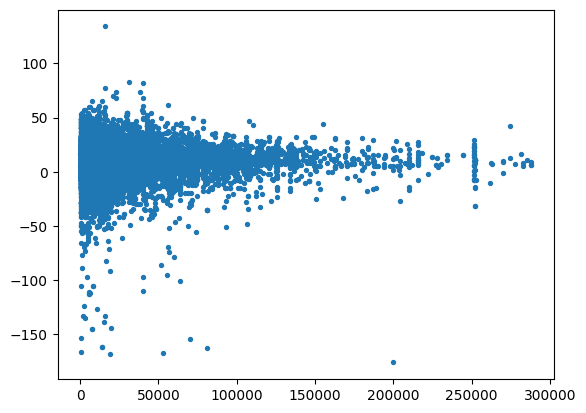

In [120]:
plt.scatter(merge2['product_volume_cm3'],merge2['delivery_accuracy_days_int'],s=8)

In [121]:
merge2['quantity']= merge2.groupby('order_id')['order_id'].transform('count')
merge2.sort_values(by='quantity',ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score_x,English_review_comment_message,review_categories,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,quantity
57622,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,1,I've been trying to cancel for a long time bec...,"shipping delays, value",...,beleza_saude,45,231,3,800.0,21.0,4.0,15.0,1260.0,21
57631,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,1,I've been trying to cancel for a long time bec...,"shipping delays, value",...,beleza_saude,45,232,3,800.0,21.0,4.0,15.0,1260.0,21
57612,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,1,I've been trying to cancel for a long time bec...,"shipping delays, value",...,beleza_saude,45,232,3,800.0,21.0,4.0,15.0,1260.0,21
57613,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,1,I've been trying to cancel for a long time bec...,"shipping delays, value",...,beleza_saude,45,231,3,800.0,21.0,4.0,15.0,1260.0,21
57626,8272b63d03f5f79c56e9e4120aec44ef,15,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,1,I've been trying to cancel for a long time bec...,"shipping delays, value",...,beleza_saude,45,232,3,800.0,21.0,4.0,15.0,1260.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113255,fff60e5408a9dd1e92ee30023052af30,1,1a405418406359cc2b8815f93bf359c2,4d6d651bd7684af3fffabd5f08d12e5a,2018-02-05 10:55:55,129.90,18.80,NaN,NaN,NaN,...,esporte_lazer,56,1007,2,4550.0,20.0,20.0,20.0,8000.0,1
113256,fff6889749958e42b47a7977a4cf0ea0,1,75f6a4f019ec1322758d53b2fee2cc12,058cb5aeb36d7c0fcae20fc85d5e0a59,2017-10-01 22:56:15,92.00,31.60,NaN,NaN,NaN,...,malas_acessorios,41,155,3,16050.0,60.0,40.0,40.0,96000.0,1
113257,fff6b8ca971f8e3ec822e99d0f2d3d21,1,9afaad66aca8b0c79e4f084a89c9c92b,42bde9fef835393bb8a8849cb6b7f245,2017-09-21 12:04:29,199.00,16.83,NaN,NaN,NaN,...,telefonia,44,965,3,150.0,20.0,7.0,14.0,1960.0,1
113258,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91,NaN,NaN,NaN,...,relogios_presentes,33,658,3,400.0,19.0,9.0,15.0,2565.0,1


### Line Chart of Delivery Accuracy Over Time

In [122]:
merge2['order_date'] = merge2['order_purchase_timestamp'].dt.date
daily_avg = merge2.groupby('order_date')['delivery_accuracy_days_int'].mean().reset_index()
daily_avg

,order_date,delivery_accuracy_days_int
0,2016-09-15,-37.000000
1,2016-10-03,16.400000
2,2016-10-04,30.173913
3,2016-10-05,36.000000
4,2016-10-06,34.677419
...,...,...
607,2018-08-25,6.208333
608,2018-08-26,8.733333
609,2018-08-27,6.034483
610,2018-08-28,6.142857


<Axes: xlabel='order_date'>

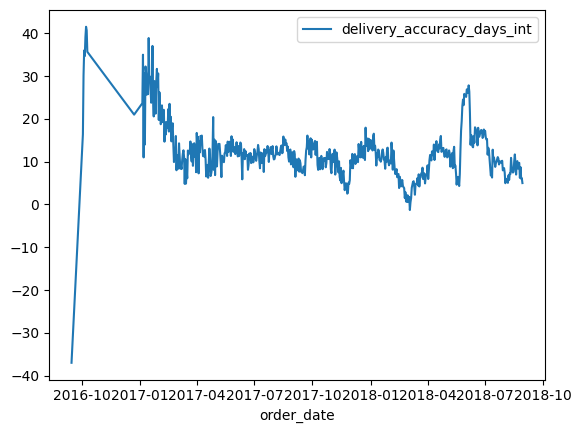

In [123]:
daily_avg.plot(x='order_date', y='delivery_accuracy_days_int', kind='line')

In [124]:
merge2['order_year_month'] = merge2['order_purchase_timestamp'].dt.to_period('M')
monthly_avg = merge2.groupby('order_year_month')['delivery_accuracy_days_int'].mean().reset_index()
monthly_avg

,order_year_month,delivery_accuracy_days_int
0,2016-09,-37.000000
1,2016-10,35.741525
2,2016-12,21.000000
3,2017-01,26.369077
4,2017-02,18.103532
5,2017-03,10.656076
6,2017-04,11.590529
7,2017-05,12.350181
8,2017-06,11.457816
9,2017-07,11.665631


<Axes: xlabel='order_year_month'>

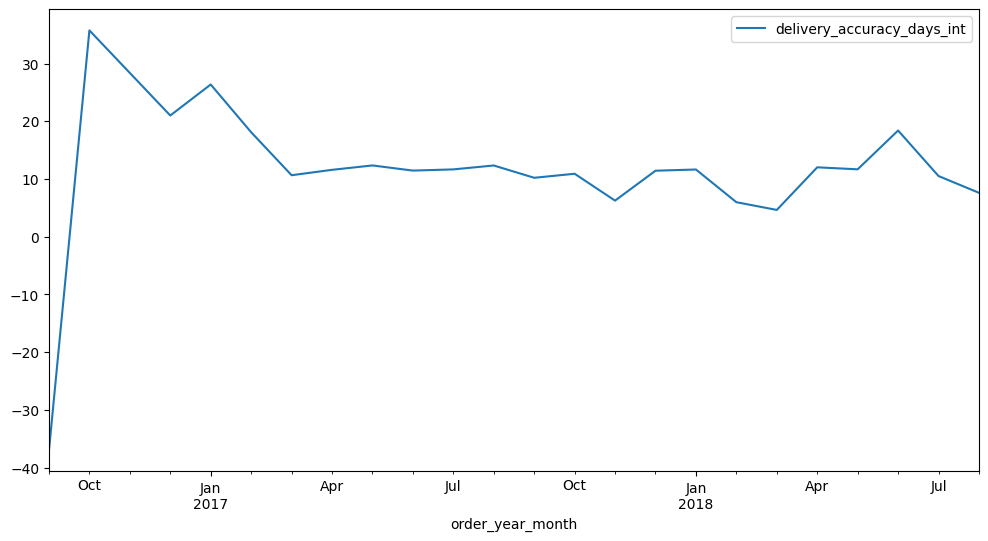

In [125]:
monthly_avg.plot(x='order_year_month', y='delivery_accuracy_days_int', kind='line', figsize=(12, 6))

## Calculating Distance from Seller to Customer

In [126]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers
    r = 6371
    return c * r


In [127]:
merge2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score_x,English_review_comment_message,review_categories,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,quantity,order_date,order_year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,5,"Perfect, product delivered ahead of schedule.","shipping delays, shipping satisfaction, fast s...",...,598,4,650.0,28.0,9.0,14.0,3528.0,1,2017-09-13,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,NaN,NaN,NaN,...,239,2,30000.0,50.0,30.0,40.0,60000.0,1,NaT,NaT
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,5,It arrived ahead of schedule and the product e...,"shipping satisfaction, fast shipping, conditio...",...,695,2,3050.0,33.0,13.0,33.0,14157.0,1,2018-01-14,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,NaN,NaN,NaN,...,480,1,200.0,16.0,10.0,15.0,2400.0,1,NaT,NaT
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5,I liked it because it arrived on time.,shipping delays,...,409,1,3750.0,35.0,40.0,30.0,42000.0,1,2017-02-04,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,NaN,NaN,NaN,...,1002,3,10150.0,89.0,15.0,40.0,53400.0,1,NaT,NaT
113272,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,NaN,NaN,NaN,...,232,1,8950.0,45.0,26.0,38.0,44460.0,1,NaT,NaT
113273,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,NaN,NaN,NaN,...,869,1,967.0,21.0,24.0,19.0,9576.0,1,NaT,NaT
113274,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,5,I received the product ahead of schedule and i...,"shipping satisfaction, fast shipping",...,1306,1,100.0,20.0,20.0,20.0,8000.0,1,2017-08-14,2017-08


In [128]:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [129]:
customers['customer_city']

0                       franca
1        sao bernardo do campo
2                    sao paulo
3              mogi das cruzes
4                     campinas
                 ...          
99436                sao paulo
99437          taboao da serra
99438                fortaleza
99439                   canoas
99440                    cotia
Name: customer_city, Length: 99441, dtype: object

In [130]:
pd.set_option('display.max_rows', 99441)

In [131]:
print(customers['customer_city'])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [132]:
merge2.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_score_x',
       'English_review_comment_message', 'review_categories', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'carrier_to_customer',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'delivery_category', 'full_delivery_days', 'review_id',
       'review_score_y', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'condition',
       'seller', 'value', 'accuracy', 'logistics', 'shipping delays',
       'fast shipping', 'performance', 'damage', 'wrong', 'billing',
       'delivery_accuracy_days_int', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'pro

In [133]:
merge3=pd.merge(merge2, customers, on='customer_id', how='left')
merge3=pd.merge(merge3, sellers, on='seller_id', how='left')
merge3=merge3[['order_id','seller_id', 'freight_value', 'customer_id',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'delivery_category', 'full_delivery_days', 'delivery_accuracy_days_int',
        'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state']]
merge3

,order_id,seller_id,freight_value,customer_id,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,delivery_accuracy_days_int,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,13.29,3ce436f183e68e07877b285a838db11a,6 days 08:48:41,7 days 13:58:13,8 days 00:16:12,Underestimated,8.0,8.0,28013.0,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,19.93,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,17.87,6489ae5e4333f3693df5ad4372dab6d3,1 days 21:48:18,7 days 22:30:46,13 days 10:40:44,Underestimated,8.0,13.0,35661.0,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.79,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,18.14,58dbd0b2d70206bf40e62cd34e84d795,11 days 19:35:56,25 days 02:32:18,15 days 07:17:29,Underestimated,25.0,15.0,13226.0,varzea paulista,SP,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,43.41,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,88303,itajai,SC
113272,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,36.53,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1206,sao paulo,SP
113273,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,16.95,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,80610,curitiba,PR
113274,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,8.72,b5e6afd5a41800fdf401e0272ca74655,0 days 18:58:21,1 days 21:55:08,8 days 02:00:20,Underestimated,2.0,8.0,13289.0,vinhedo,SP,4733,sao paulo,SP


In [134]:
merge3.columns

Index(['order_id', 'seller_id', 'freight_value', 'customer_id',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'delivery_category', 'full_delivery_days', 'delivery_accuracy_days_int',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [135]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [136]:
state_coords = geolocation.groupby('geolocation_state')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
state_coords.columns = ['state', 'avg_lat', 'avg_lng']
state_coords

,state,avg_lat,avg_lng
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649
5,CE,-4.363151,-39.004140
6,DF,-15.810885,-47.969630
7,ES,-20.105145,-40.503183
8,GO,-16.577645,-49.334195
9,MA,-3.798997,-44.818627


In [137]:
city_coords = geolocation.groupby('geolocation_city')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
city_coords.columns = ['city', 'avg_lat', 'avg_lng']
city_coords.head()

,city,avg_lat,avg_lng
0,* cidade,-25.571748,-49.334374
1,...arraial do cabo,-22.969370,-42.029834
2,4o. centenario,-24.271860,-53.069433
3,4º centenario,-24.279801,-53.074723
4,abadia de goias,-16.767063,-49.438089


In [138]:
# Merge customer coordinates
merge4 = merge3.merge(city_coords, left_on='customer_city', right_on='city', how='left')
merge4.rename(columns={'avg_lat': 'customer_lat', 'avg_lng': 'customer_lon'}, inplace=True)
merge4.drop(columns='city', inplace=True)

# Merge seller coordinates
merge4 = merge4.merge(city_coords, left_on='seller_city', right_on='city', how='left')
merge4.rename(columns={'avg_lat': 'seller_lat', 'avg_lng': 'seller_lon'}, inplace=True)
merge4.drop(columns='city', inplace=True)

merge4

,order_id,seller_id,freight_value,customer_id,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,delivery_accuracy_days_int,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lon,seller_lat,seller_lon
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,13.29,3ce436f183e68e07877b285a838db11a,6 days 08:48:41,7 days 13:58:13,8 days 00:16:12,Underestimated,8.0,8.0,28013.0,campos dos goytacazes,RJ,27277,volta redonda,SP,-21.761359,-41.320680,-22.508669,-44.097172
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,19.93,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3471,sao paulo,SP,NaN,NaN,-23.570860,-46.633242
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,17.87,6489ae5e4333f3693df5ad4372dab6d3,1 days 21:48:18,7 days 22:30:46,13 days 10:40:44,Underestimated,8.0,13.0,35661.0,para de minas,MG,37564,borda da mata,MG,-19.861760,-44.602634,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.79,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,14403,franca,SP,NaN,NaN,-20.534057,-47.398437
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,18.14,58dbd0b2d70206bf40e62cd34e84d795,11 days 19:35:56,25 days 02:32:18,15 days 07:17:29,Underestimated,25.0,15.0,13226.0,varzea paulista,SP,87900,loanda,PR,-23.214141,-46.833432,-22.929384,-53.135873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,43.41,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,88303,itajai,SC,NaN,NaN,-26.908682,-48.681900
113272,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,36.53,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1206,sao paulo,SP,NaN,NaN,-23.570860,-46.633242
113273,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,16.95,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,80610,curitiba,PR,NaN,NaN,-25.453054,-49.274996
113274,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,8.72,b5e6afd5a41800fdf401e0272ca74655,0 days 18:58:21,1 days 21:55:08,8 days 02:00:20,Underestimated,2.0,8.0,13289.0,vinhedo,SP,4733,sao paulo,SP,-23.038253,-46.980026,-23.570860,-46.633242


In [139]:
merge4['samecity_or_not'] = merge4['customer_city'] == merge4['seller_city']

In [223]:
merge4.columns

Index(['order_id', 'seller_id', 'freight_value', 'customer_id',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'delivery_category', 'full_delivery_days', 'delivery_accuracy_days_int',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_lat',
       'customer_lon', 'seller_lat', 'seller_lon', 'samecity_or_not'],
      dtype='object')

In [231]:
testing_distance=merge4[['order_id', 'seller_id', 'freight_value', 'customer_id','delivery_category',
        'full_delivery_days', 'delivery_accuracy_days_int',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_lat',
       'customer_lon', 'seller_lat', 'seller_lon', 'samecity_or_not']]
testing_distance['distance_km'] = haversine(
    testing_distance['customer_lat'], testing_distance['customer_lon'],
    testing_distance['seller_lat'], testing_distance['seller_lon'])
testing_distance.dropna(subset=['distance_km'],inplace=True)

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\665817122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_distance['distance_km'] = haversine(
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\665817122.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_distance.dropna(subset=['distance_km'],inplace=True)


In [232]:
testing_distance.head()

,order_id,seller_id,freight_value,customer_id,delivery_category,full_delivery_days,delivery_accuracy_days_int,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lon,seller_lat,seller_lon,samecity_or_not,distance_km
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,13.29,3ce436f183e68e07877b285a838db11a,Underestimated,8.0,8.0,28013.0,campos dos goytacazes,RJ,27277,volta redonda,SP,-21.761359,-41.320680,-22.508669,-44.097172,False,297.799334
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,17.87,6489ae5e4333f3693df5ad4372dab6d3,Underestimated,8.0,13.0,35661.0,para de minas,MG,37564,borda da mata,MG,-19.861760,-44.602634,-22.262584,-46.171124,False,312.651733
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,18.14,58dbd0b2d70206bf40e62cd34e84d795,Underestimated,25.0,15.0,13226.0,varzea paulista,SP,87900,loanda,PR,-23.214141,-46.833432,-22.929384,-53.135873,False,645.471923
8,0005a1a1728c9d785b8e2b08b904576c,a416b6a846a11724393025641d4edd5e,11.65,16150771dfd4776261284213b89c304e,Within expected range,9.0,-1.0,11075.0,santos,SP,3702,sao paulo,SP,-23.962523,-46.327804,-23.570860,-46.633242,False,53.505371
10,00061f2a7bc09da83e415a52dc8a4af1,cc419e0650a3c5ba77189a1882b7556a,8.88,c6fc061d86fab1e2b2eac259bac71a49,Underestimated,4.0,10.0,13419.0,piracicaba,SP,9015,santo andre,SP,-22.725841,-47.646622,-23.655241,-46.519084,False,154.794160


<Axes: >

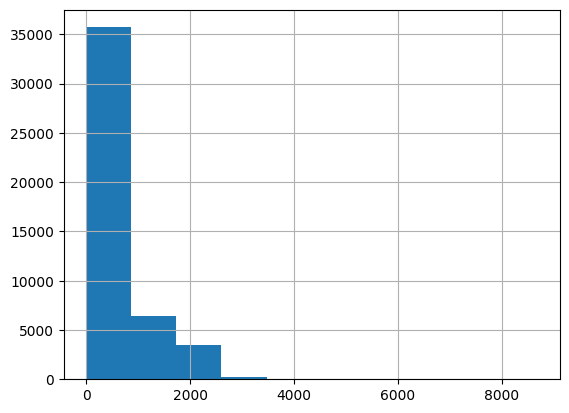

In [233]:
testing_distance.distance_km.hist()

In [236]:
testing_distance['distance_bin'] = pd.cut(testing_distance['distance_km'], bins=[0, 50, 200, 500, 1000, 2000, 4000], 
                            labels=['0-50km', '50-200km', '200-500km', '500-1k', '1k-2k', '2k-4k'])

distance = testing_distance.groupby('distance_bin')[['full_delivery_days', 'delivery_accuracy_days_int']].mean().reset_index()
distance

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\4052825854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_distance['distance_bin'] = pd.cut(testing_distance['distance_km'], bins=[0, 50, 200, 500, 1000, 2000, 4000],
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\4052825854.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance = testing_distance.groupby('distance_bin')[['full_delivery_days', 'delivery_accuracy_days_int']].mean().reset_index()


,distance_bin,full_delivery_days,delivery_accuracy_days_int
0,0-50km,6.601162,8.647984
1,50-200km,7.886031,9.700790
2,200-500km,12.263840,11.114460
3,500-1k,14.546438,11.326233
4,1k-2k,18.129121,11.571964
5,2k-4k,21.456331,10.795861


In [237]:
distance.to_csv('distance.csv')

In [140]:
samecitydf= merge4[merge4['samecity_or_not']==True]

In [141]:
samecitydf[samecitydf['delivery_category']=='Underestimated'].shape

(1887, 21)

In [142]:
samecitydf.delivery_category.unique()

array(['Underestimated', 'Within expected range', 'Overestimated'],
      dtype=object)

In [221]:
samecitydf.head()

,order_id,seller_id,freight_value,customer_id,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,delivery_accuracy_days_int,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lon,seller_lat,seller_lon,samecity_or_not
20,000e63d38ae8c00bbcb5a30573b99628,1c129092bf23f28a5930387c980c0dfc,8.88,98884e672c5ba85f4394f2044e1a3eab,3 days 01:30:59,3 days 18:43:58,8 days 09:08:13,Underestimated,4.0,8.0,...,sao paulo,SP,2972,sao paulo,SP,-23.57086,-46.633242,-23.57086,-46.633242,True
48,001d8f0e34a38c37f7dba2a37d4eba8b,f4aba7c0bca51484c30ab7bdc34bcdd1,7.78,d987da9fb4086ab7c2c0f83963cd6722,9 days 22:09:50,11 days 19:39:39,-3 days +10:45:10,Within expected range,12.0,-3.0,...,sao paulo,SP,1031,sao paulo,SP,-23.57086,-46.633242,-23.57086,-46.633242,True
49,001d8f0e34a38c37f7dba2a37d4eba8b,f4aba7c0bca51484c30ab7bdc34bcdd1,7.78,d987da9fb4086ab7c2c0f83963cd6722,9 days 22:09:50,11 days 19:39:39,-3 days +10:45:10,Within expected range,12.0,-3.0,...,sao paulo,SP,1031,sao paulo,SP,-23.57086,-46.633242,-23.57086,-46.633242,True
188,0079bca8e89bd52fdb87408e4f3fb94d,4c2b230173bb36f9b240f2b8ac11786e,7.39,137f50d5bfbcfb9578c50605cc9adb16,2 days 07:36:17,3 days 17:24:43,9 days 03:01:34,Underestimated,4.0,9.0,...,sao paulo,SP,3933,sao paulo,SP,-23.57086,-46.633242,-23.57086,-46.633242,True
189,007bbb40c95870c0f75a7855f2636c65,1e8b33f18b4f7598d87f5cbee2282cc2,13.95,72a46280034e63cc3703b1f969f65733,0 days 21:06:10,2 days 00:05:04,10 days 05:21:06,Underestimated,2.0,10.0,...,sao paulo,SP,2066,sao paulo,SP,-23.57086,-46.633242,-23.57086,-46.633242,True


In [143]:
samecitydf['delivery_category'].value_counts(normalize=True) * 100

delivery_category
Underestimated           83.532537
Within expected range    11.553785
Overestimated             4.913679
Name: proportion, dtype: float64

In [144]:
differentcitydf= merge4[merge4['samecity_or_not']==False]
differentcitydf

,order_id,seller_id,freight_value,customer_id,seller_to_carrier,full_delivery_time,delivery_accuracy_days,delivery_category,full_delivery_days,delivery_accuracy_days_int,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lon,seller_lat,seller_lon,samecity_or_not
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,13.29,3ce436f183e68e07877b285a838db11a,6 days 08:48:41,7 days 13:58:13,8 days 00:16:12,Underestimated,8.0,8.0,...,campos dos goytacazes,RJ,27277,volta redonda,SP,-21.761359,-41.320680,-22.508669,-44.097172,False
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,19.93,NaN,NaT,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,3471,sao paulo,SP,NaN,NaN,-23.570860,-46.633242,False
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,17.87,6489ae5e4333f3693df5ad4372dab6d3,1 days 21:48:18,7 days 22:30:46,13 days 10:40:44,Underestimated,8.0,13.0,...,para de minas,MG,37564,borda da mata,MG,-19.861760,-44.602634,-22.262584,-46.171124,False
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.79,NaN,NaT,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,14403,franca,SP,NaN,NaN,-20.534057,-47.398437,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,18.14,58dbd0b2d70206bf40e62cd34e84d795,11 days 19:35:56,25 days 02:32:18,15 days 07:17:29,Underestimated,25.0,15.0,...,varzea paulista,SP,87900,loanda,PR,-23.214141,-46.833432,-22.929384,-53.135873,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,43.41,NaN,NaT,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,88303,itajai,SC,NaN,NaN,-26.908682,-48.681900,False
113272,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,36.53,NaN,NaT,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,1206,sao paulo,SP,NaN,NaN,-23.570860,-46.633242,False
113273,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,16.95,NaN,NaT,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,80610,curitiba,PR,NaN,NaN,-25.453054,-49.274996,False
113274,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,8.72,b5e6afd5a41800fdf401e0272ca74655,0 days 18:58:21,1 days 21:55:08,8 days 02:00:20,Underestimated,2.0,8.0,...,vinhedo,SP,4733,sao paulo,SP,-23.038253,-46.980026,-23.570860,-46.633242,False


In [145]:
differentcitydf['delivery_category'].value_counts(normalize=True) * 100

delivery_category
Underestimated           85.340468
Overestimated             7.714711
Within expected range     6.944821
Name: proportion, dtype: float64

In [146]:
#same city to all order 
(samecitydf.shape[0]/merge4.shape[0])*100

1.9942441470390906

In [147]:
(differentcitydf.shape[0]/merge4.shape[0])*100

98.0057558529609

In [148]:
samecitydf[samecitydf['delivery_category']=='Underestimated']['delivery_accuracy_days_int'].mean()

np.float64(10.234234234234235)

In [170]:
samecity_percent = samecitydf['delivery_category'].value_counts(normalize=True).mul(100)
differentcity_percent = differentcitydf['delivery_category'].value_counts(normalize=True).mul(100)

delivery_comparison = pd.DataFrame({
    'Same City (%)': samecity_percent,
    'Different City (%)': differentcity_percent
})

delivery_comparison = delivery_comparison.round(2)
flipped_table = delivery_comparison.transpose()
flipped_table.to_csv('flipped_table.csv')

In [172]:
samecity_percent = samecitydf['delivery_category'].value_counts(normalize=True).mul(100).round(2)
differentcity_percent = differentcitydf['delivery_category'].value_counts(normalize=True).mul(100).round(2)

samecity_df = samecity_percent.reset_index()
samecity_df.columns = ['delivery_category', 'percentage']
samecity_df['city_type'] = 'Same City'

differentcity_df = differentcity_percent.reset_index()
differentcity_df.columns = ['delivery_category', 'percentage']
differentcity_df['city_type'] = 'Different City'

combined_df = pd.concat([samecity_df, differentcity_df], ignore_index=True)
combined_df = combined_df[['city_type', 'delivery_category', 'percentage']]

combined_df.to_csv('combined_df.csv')


### Speed: Number of Deliverd Orders & Delivery Accuracy Days Over Time

In [149]:
monthly_avg

,order_year_month,delivery_accuracy_days_int
0,2016-09,-37.000000
1,2016-10,35.741525
2,2016-12,21.000000
3,2017-01,26.369077
4,2017-02,18.103532
5,2017-03,10.656076
6,2017-04,11.590529
7,2017-05,12.350181
8,2017-06,11.457816
9,2017-07,11.665631


In [151]:
Number_of_Deliverd_orders=delivered_orders[['order_id','order_approved_at','delivery_accuracy_days_int']]
Number_of_Deliverd_orders.head()

,order_id,order_approved_at,delivery_accuracy_days_int
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,5.0
2,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,12.0
3,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:50:18,8.0
4,432aaf21d85167c2c86ec9448c4e42cc,2018-03-01 15:10:47,8.0


In [153]:
Number_of_Deliverd_orders['month_year'] = Number_of_Deliverd_orders['order_approved_at'].dt.to_period('M')
monthly_order_counts = Number_of_Deliverd_orders.groupby('month_year')['order_id'].nunique().reset_index()
monthly_order_counts


C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1490506622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Number_of_Deliverd_orders['month_year'] = Number_of_Deliverd_orders['order_approved_at'].dt.to_period('M')


,month_year,order_id
0,2016-09,1
1,2016-10,183
2,2016-12,1
3,2017-01,321
4,2017-02,710
5,2017-03,1069
6,2017-04,935
7,2017-05,1423
8,2017-06,1305
9,2017-07,1598


In [163]:
monthly_order_counts.rename(columns={'month_year': 'order_year_month'}, inplace=True)
monthly_summary = pd.merge(monthly_order_counts, monthly_avg, on='order_year_month', how='left')
monthly_summary.sort_values('order_year_month', inplace=True)
monthly_summary.columns=['order_year_month', 'count_order_id', 'avg_delivery_accuracy_days']
monthly_summary.to_csv('monthly_summary.csv')

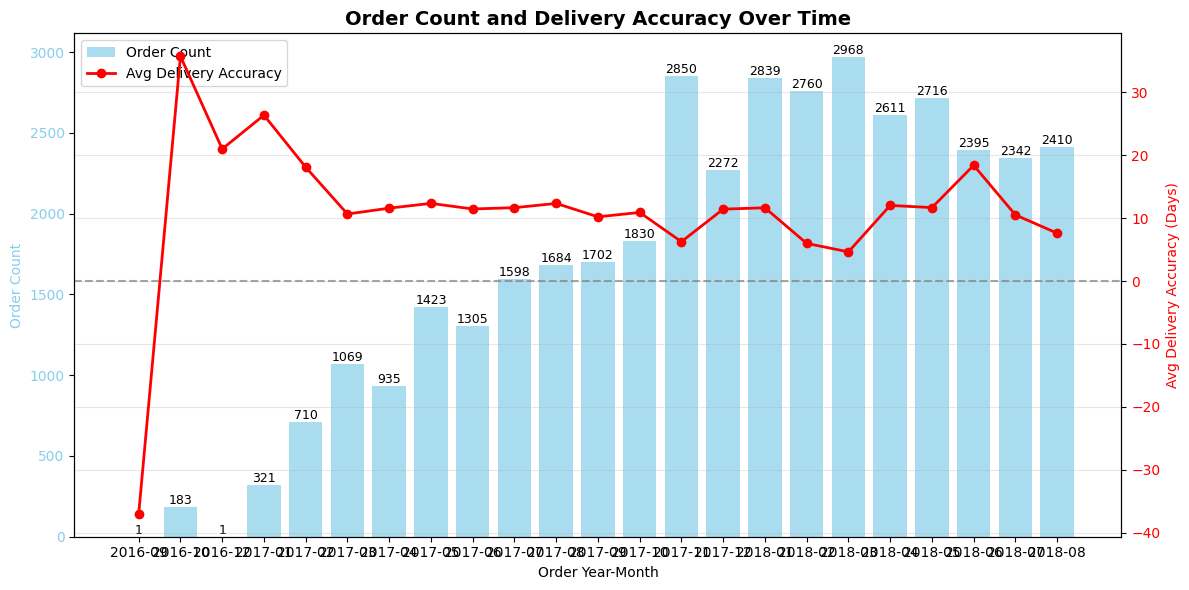

In [190]:
import matplotlib.pyplot as plt
# Convert the Period type to string for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
# Create bar chart for order count - convert to string first
x_labels = monthly_summary['order_year_month'].astype(str)
bars = ax1.bar(x_labels, monthly_summary['count_order_id'], color='skyblue', alpha=0.7, label='Order Count')
ax1.set_xlabel('Order Year-Month')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
# Create secondary y-axis for delivery accuracy
ax2 = ax1.twinx()
line = ax2.plot(x_labels, monthly_summary['avg_delivery_accuracy_days'], color='red', marker='o', linewidth=2, markersize=6, label='Avg Delivery Accuracy')
ax2.set_ylabel('Avg Delivery Accuracy (Days)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add a horizontal line at y=0 for reference
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
# Add titles and legends
plt.title('Order Count and Delivery Accuracy Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.grid(True, alpha=0.3)
plt.show()

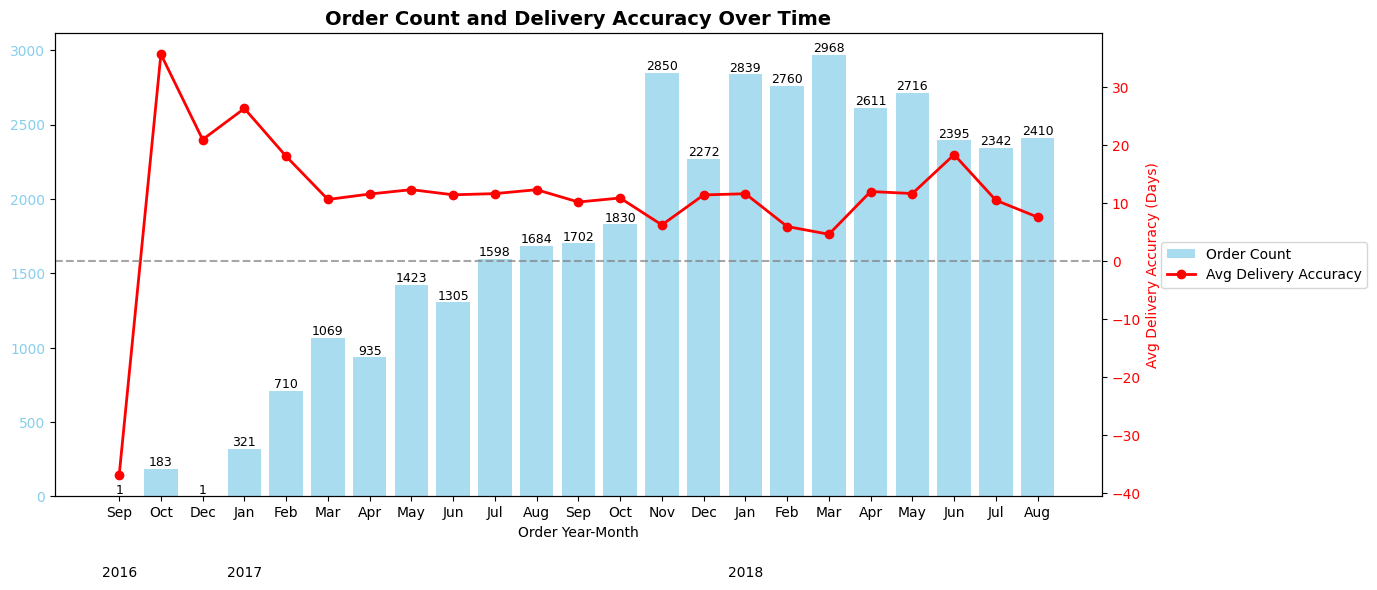

In [192]:
import matplotlib.pyplot as plt
# Convert the Period type to string for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
# Create bar chart for order count - convert to string first
x_labels = monthly_summary['order_year_month'].astype(str)
# Create custom x-axis labels with 3-letter months and years below
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
custom_labels = []
years = []
for date_str in x_labels:
    year, month = date_str.split('-')
    month_name = month_abbr[int(month)-1]  # -1 because months are 1-indexed
    custom_labels.append(month_name)
    years.append(year)
bars = ax1.bar(range(len(x_labels)), monthly_summary['count_order_id'], color='skyblue', alpha=0.7, label='Order Count')
ax1.set_xlabel('Order Year-Month')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
# Set x-axis ticks with month names and years
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(custom_labels)
# Add year labels below month labels
for i, year in enumerate(years):
    if i == 0 or year != years[i-1]:  # Only show year when it changes
        ax1.text(i, -0.15, year, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Create secondary y-axis for delivery accuracy
ax2 = ax1.twinx()
line = ax2.plot(range(len(x_labels)), monthly_summary['avg_delivery_accuracy_days'], color='red', marker='o', linewidth=2, markersize=6, label='Avg Delivery Accuracy')
ax2.set_ylabel('Avg Delivery Accuracy (Days)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add a horizontal line at y=0 for reference (keep only this line)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
# Remove gridlines
ax1.grid(False)
ax2.grid(False)
# Add titles
plt.title('Order Count and Delivery Accuracy Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
# Combine legends from both axes and move to right outside
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Remove the order count y-axis label since values are on bars
ax1.set_ylabel('')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.show()

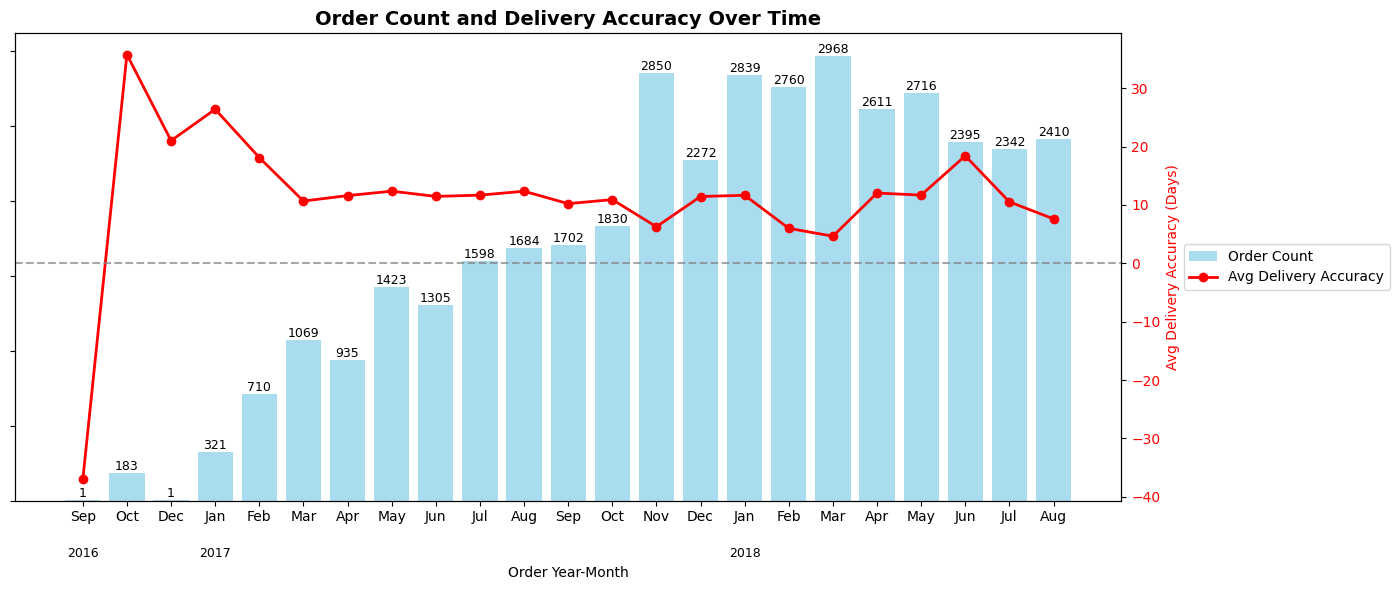

In [193]:
import matplotlib.pyplot as plt
# Convert the Period type to string for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
# Create bar chart for order count - convert to string first
x_labels = monthly_summary['order_year_month'].astype(str)
# Create custom x-axis labels with 3-letter months and years below
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
custom_labels = []
years = []
for date_str in x_labels:
    year, month = date_str.split('-')
    month_name = month_abbr[int(month)-1]  # -1 because months are 1-indexed
    custom_labels.append(month_name)
    years.append(year)
bars = ax1.bar(range(len(x_labels)), monthly_summary['count_order_id'], color='skyblue', alpha=0.7, label='Order Count')
# Set x-axis ticks with month names
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(custom_labels)
# Add year labels below month labels
for i, year in enumerate(years):
    if i == 0 or year != years[i-1]:  # Only show year when it changes
        ax1.text(i, -0.1, year, ha='center', va='top', transform=ax1.get_xaxis_transform(), fontsize=9)
# Set x-axis label below the years
ax1.set_xlabel('Order Year-Month', labelpad=30)  # Add extra padding to move label down
# Create secondary y-axis for delivery accuracy but we'll use it as primary
ax2 = ax1.twinx()
line = ax2.plot(range(len(x_labels)), monthly_summary['avg_delivery_accuracy_days'], color='red', marker='o', linewidth=2, markersize=6, label='Avg Delivery Accuracy')
# Move delivery accuracy to left axis and remove order count axis
ax2.set_ylabel('Avg Delivery Accuracy (Days)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Remove the order count y-axis completely
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelleft=False)  # Hide the left y-axis labels
# Add a horizontal line at y=0 for reference (keep only this line)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
# Remove gridlines
ax1.grid(False)
ax2.grid(False)
# Add titles
plt.title('Order Count and Delivery Accuracy Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
# Combine legends from both axes and move to right outside
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.show()

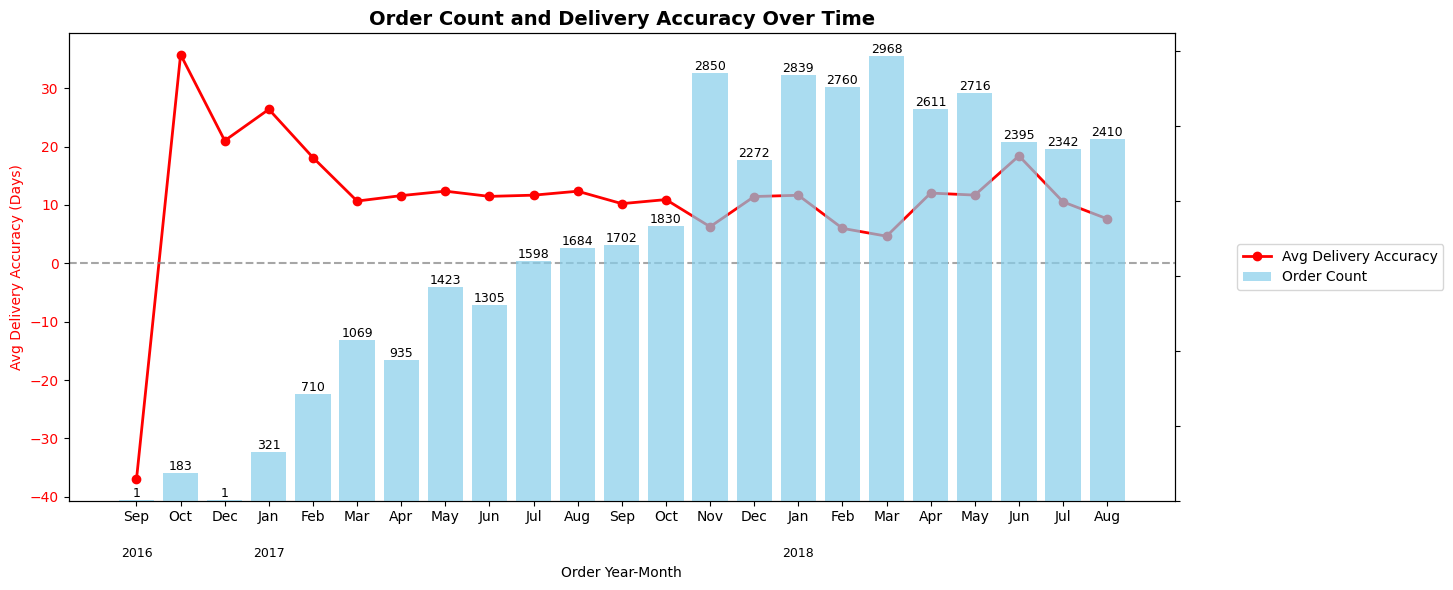

In [203]:
import matplotlib.pyplot as plt
# Convert the Period type to string for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
# Create bar chart for order count - convert to string first
x_labels = monthly_summary['order_year_month'].astype(str)
# Create custom x-axis labels with 3-letter months and years below
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
custom_labels = []
years = []
for date_str in x_labels:
    year, month = date_str.split('-')
    month_name = month_abbr[int(month)-1]  # -1 because months are 1-indexed
    custom_labels.append(month_name)
    years.append(year)
# FIRST: Create the line for delivery accuracy on left y-axis
line = ax1.plot(range(len(x_labels)), monthly_summary['avg_delivery_accuracy_days'], color='red', marker='o', linewidth=2, markersize=6, label='Avg Delivery Accuracy')
ax1.set_ylabel('Avg Delivery Accuracy (Days)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Add a horizontal line at y=0 for reference
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
# SECOND: Create bars for order count on right y-axis (but we'll hide the labels)
ax2 = ax1.twinx()
bars = ax2.bar(range(len(x_labels)), monthly_summary['count_order_id'], color='skyblue', alpha=0.7, label='Order Count')
# Hide the right y-axis (order count axis)
ax2.set_ylabel('')
ax2.tick_params(axis='y', labelright=False)
# Set x-axis ticks with month names
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(custom_labels)
# Add year labels below month labels
for i, year in enumerate(years):
    if i == 0 or year != years[i-1]:  # Only show year when it changes
        ax1.text(i, -0.1, year, ha='center', va='top', transform=ax1.get_xaxis_transform(), fontsize=9)
# Set x-axis label below the years
ax1.set_xlabel('Order Year-Month', labelpad=30)
# Remove gridlines
ax1.grid(False)
ax2.grid(False)
# Add titles
plt.title('Order Count and Delivery Accuracy Over Time', fontsize=14, fontweight='bold')
fig.tight_layout()
# Combine legends from both axes and move to right outside
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5))
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.show()


### Early order Estimation Density Maps 

In [241]:
state_days=pd.DataFrame(delivered_customers.groupby('customer_state')['delivery_accuracy_days_int'].mean())

In [243]:
state_days.to_csv('state_accuracy_days.csv')

## Freight

### freight ratio by product group

In [247]:
merge2.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_score_x',
       'English_review_comment_message', 'review_categories', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'carrier_to_customer',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'delivery_category', 'full_delivery_days', 'review_id',
       'review_score_y', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'condition',
       'seller', 'value', 'accuracy', 'logistics', 'shipping delays',
       'fast shipping', 'performance', 'damage', 'wrong', 'billing',
       'delivery_accuracy_days_int', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'pro

In [248]:
freight_by_prodcut_group = merge2[['order_id', 'customer_id', 'product_category_name', 'price', 'freight_value']]
freight_by_prodcut_group

,order_id,customer_id,product_category_name,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,NaN,pet_shop,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,NaN,perfumaria,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14
...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,NaN,utilidades_domesticas,299.99,43.41
113272,fffcd46ef2263f404302a634eb57f7eb,NaN,informatica_acessorios,350.00,36.53
113273,fffce4705a9662cd70adb13d4a31832d,NaN,esporte_lazer,99.90,16.95
113274,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,informatica_acessorios,55.99,8.72


In [249]:
freight_by_prodcut_group['category_group'] = freight_by_prodcut_group['product_category_name'].map(category_groups_9)
freight_by_prodcut_group.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1467635372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_prodcut_group['category_group'] = freight_by_prodcut_group['product_category_name'].map(category_groups_9)


,order_id,customer_id,product_category_name,price,freight_value,category_group
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,Leisure & Lifestyle
1,00018f77f2f0320c557190d7a144bdd3,NaN,pet_shop,239.90,19.93,Leisure & Lifestyle
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,NaN
3,00024acbcdf0a6daa1e931b038114c75,NaN,perfumaria,12.99,12.79,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,NaN


In [250]:
freight_by_prodcut_group = freight_by_prodcut_group.merge(customers[['customer_id', 'customer_state']], on='customer_id', how='left')
freight_by_prodcut_group

,order_id,customer_id,product_category_name,price,freight_value,category_group,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,Leisure & Lifestyle,RJ
1,00018f77f2f0320c557190d7a144bdd3,NaN,pet_shop,239.90,19.93,Leisure & Lifestyle,NaN
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,NaN,MG
3,00024acbcdf0a6daa1e931b038114c75,NaN,perfumaria,12.99,12.79,NaN,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,NaN,SP
...,...,...,...,...,...,...,...
113271,fffc94f6ce00a00581880bf54a75a037,NaN,utilidades_domesticas,299.99,43.41,NaN,NaN
113272,fffcd46ef2263f404302a634eb57f7eb,NaN,informatica_acessorios,350.00,36.53,NaN,NaN
113273,fffce4705a9662cd70adb13d4a31832d,NaN,esporte_lazer,99.90,16.95,NaN,NaN
113274,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,informatica_acessorios,55.99,8.72,NaN,SP


In [251]:
freight_by_prodcut_group = freight_by_prodcut_group.dropna(subset=['customer_state'])
freight_by_prodcut_group.head()

,order_id,customer_id,product_category_name,price,freight_value,category_group,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,Leisure & Lifestyle,RJ
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,NaN,MG
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,NaN,SP
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,beleza_saude,145.95,11.65,NaN,SP
10,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,beleza_saude,59.99,8.88,NaN,SP


In [253]:
freight_by_prodcut_group['product_category_name_english'] = freight_by_prodcut_group['product_category_name'].map(translation_dict)
freight_by_prodcut_group.drop(columns=['category_group'], inplace=True)
freight_by_prodcut_group.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\3696098232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_prodcut_group['product_category_name_english'] = freight_by_prodcut_group['product_category_name'].map(translation_dict)
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\3696098232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_prodcut_group.drop(columns=['category_group'], inplace=True)


,order_id,customer_id,product_category_name,price,freight_value,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,RJ,cool_stuff
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,MG,furniture_decor
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,SP,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,beleza_saude,145.95,11.65,SP,health_beauty
10,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,beleza_saude,59.99,8.88,SP,health_beauty


In [255]:
freight_by_prodcut_group['category_group'] = freight_by_prodcut_group['product_category_name_english'].map(category_groups_9)
freight_by_prodcut_group.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1032901820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_prodcut_group['category_group'] = freight_by_prodcut_group['product_category_name_english'].map(category_groups_9)


,order_id,customer_id,product_category_name,price,freight_value,customer_state,product_category_name_english,category_group
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,RJ,cool_stuff,Leisure & Lifestyle
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,MG,furniture_decor,Home & Furniture
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,SP,garden_tools,Leisure & Lifestyle
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,beleza_saude,145.95,11.65,SP,health_beauty,Baby & Health
10,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,beleza_saude,59.99,8.88,SP,health_beauty,Baby & Health


In [256]:
freight_by_prodcut_group['freight_ratio'] = freight_by_prodcut_group['freight_value'] / freight_by_prodcut_group['price']

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\4227076195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_prodcut_group['freight_ratio'] = freight_by_prodcut_group['freight_value'] / freight_by_prodcut_group['price']


In [257]:
freight_by_prodcut_group.head()

,order_id,customer_id,product_category_name,price,freight_value,customer_state,product_category_name_english,category_group,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,cool_stuff,58.90,13.29,RJ,cool_stuff,Leisure & Lifestyle,0.225637
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,moveis_decoracao,199.00,17.87,MG,furniture_decor,Home & Furniture,0.089799
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ferramentas_jardim,199.90,18.14,SP,garden_tools,Leisure & Lifestyle,0.090745
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,beleza_saude,145.95,11.65,SP,health_beauty,Baby & Health,0.079822
10,00061f2a7bc09da83e415a52dc8a4af1,c6fc061d86fab1e2b2eac259bac71a49,beleza_saude,59.99,8.88,SP,health_beauty,Baby & Health,0.148025


In [263]:
group_freight_ratio=freight_by_prodcut_group.groupby('category_group')['freight_ratio'].mean().sort_values(ascending=False).reset_index()
group_freight_ratio

,category_group,freight_ratio
0,Food & Drink,0.424560
1,Electronics & Tech,0.420206
2,Baby & Health,0.317503
3,"Books, Music & Art",0.316842
4,Appliances & Tools,0.316081
5,Home & Furniture,0.304041
6,Leisure & Lifestyle,0.298201
7,Business & Services,0.256423
8,Fashion & Accessories,0.226935


In [267]:
group_freight_ratio.to_csv('group_freight_ratio.csv')

In [265]:
state_by_group = freight_by_prodcut_group.groupby(['customer_state', 'category_group'])['freight_ratio'].mean().reset_index()
state_by_group.head()

,customer_state,category_group,freight_ratio
0,AC,Appliances & Tools,0.868704
1,AC,Baby & Health,0.817770
2,AC,"Books, Music & Art",0.487787
3,AC,Electronics & Tech,0.734486
4,AC,Fashion & Accessories,0.457761


In [266]:
state_by_group=state_by_group.groupby('customer_state')['freight_ratio'].mean().reset_index()
state_by_group

,customer_state,freight_ratio
0,AC,0.570272
1,AL,0.619221
2,AM,0.449756
3,AP,0.314812
4,BA,0.365305
5,CE,0.365486
6,DF,0.376837
7,ES,0.334422
8,GO,0.324135
9,MA,0.508821


In [268]:
state_by_group.to_csv('state_by_group.csv')

### freight value and distance between seller and customer

In [278]:
freight_by_distance = order_items.merge(orders, on='order_id', how='left')
freight_by_distance.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_to_customer,seller_to_carrier,full_delivery_time,delivery_accuracy_days
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1 days 05:09:32,6 days 08:48:41,7 days 13:58:13,8 days 00:16:12
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8 days 01:29:24,8 days 03:29:47,16 days 04:59:11,2 days 07:55:36
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6 days 00:42:28,1 days 21:48:18,7 days 22:30:46,13 days 10:40:44
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4 days 00:04:39,2 days 03:17:42,6 days 03:22:21,5 days 10:27:21
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13 days 06:56:22,11 days 19:35:56,25 days 02:32:18,15 days 07:17:29


In [279]:
freight_by_distance=freight_by_distance.merge(customers, on='customer_id', how='left')
freight_by_distance.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'carrier_to_customer',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [281]:
freight_by_distance=freight_by_distance.merge(sellers, on='seller_id', how='left')
freight_by_distance.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'carrier_to_customer',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [282]:
city_coords.head()

,city,avg_lat,avg_lng
0,* cidade,-25.571748,-49.334374
1,...arraial do cabo,-22.969370,-42.029834
2,4o. centenario,-24.271860,-53.069433
3,4º centenario,-24.279801,-53.074723
4,abadia de goias,-16.767063,-49.438089


In [283]:
# Merge customer coordinates
freight_by_distance = freight_by_distance.merge(city_coords, left_on='customer_city', right_on='city', how='left')
freight_by_distance.rename(columns={'avg_lat': 'customer_lat', 'avg_lng': 'customer_lon'}, inplace=True)
freight_by_distance.drop(columns='city', inplace=True)

# Merge seller coordinates
freight_by_distance = freight_by_distance.merge(city_coords, left_on='seller_city', right_on='city', how='left')
freight_by_distance.rename(columns={'avg_lat': 'seller_lat', 'avg_lng': 'seller_lon'}, inplace=True)
freight_by_distance.drop(columns='city', inplace=True)

freight_by_distance.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lon,seller_lat,seller_lon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,-21.761359,-41.320680,-22.508669,-44.097172
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,15775,santa fe do sul,SP,3471,sao paulo,SP,-20.223125,-50.899863,-23.570860,-46.633242
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,35661,para de minas,MG,37564,borda da mata,MG,-19.861760,-44.602634,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,12952,atibaia,SP,14403,franca,SP,-23.123135,-46.560482,-20.534057,-47.398437
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,13226,varzea paulista,SP,87900,loanda,PR,-23.214141,-46.833432,-22.929384,-53.135873


In [285]:
freight_by_distance_final=freight_by_distance[['price', 'freight_value', 'customer_lat', 'customer_lon', 'seller_lat',
       'seller_lon']]
freight_by_distance_final.head()

,price,freight_value,customer_lat,customer_lon,seller_lat,seller_lon
0,58.90,13.29,-21.761359,-41.320680,-22.508669,-44.097172
1,239.90,19.93,-20.223125,-50.899863,-23.570860,-46.633242
2,199.00,17.87,-19.861760,-44.602634,-22.262584,-46.171124
3,12.99,12.79,-23.123135,-46.560482,-20.534057,-47.398437
4,199.90,18.14,-23.214141,-46.833432,-22.929384,-53.135873


In [286]:
freight_by_distance_final['distance_km'] = haversine(
    freight_by_distance_final['customer_lat'], freight_by_distance_final['customer_lon'],
    freight_by_distance_final['seller_lat'], freight_by_distance_final['seller_lon'])
freight_by_distance_final.dropna(subset=['distance_km'],inplace=True)
freight_by_distance_final.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1040225131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_distance_final['distance_km'] = haversine(
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1040225131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_distance_final.dropna(subset=['distance_km'],inplace=True)


,price,freight_value,customer_lat,customer_lon,seller_lat,seller_lon,distance_km
0,58.90,13.29,-21.761359,-41.320680,-22.508669,-44.097172,297.799334
1,239.90,19.93,-20.223125,-50.899863,-23.570860,-46.633242,576.413266
2,199.00,17.87,-19.861760,-44.602634,-22.262584,-46.171124,312.651733
3,12.99,12.79,-23.123135,-46.560482,-20.534057,-47.398437,300.602005
4,199.90,18.14,-23.214141,-46.833432,-22.929384,-53.135873,645.471923


In [287]:
freight_by_distance_final['freight_ratio'] = freight_by_distance_final['freight_value'] / freight_by_distance_final['price']
freight_by_distance_final

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\350176364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_distance_final['freight_ratio'] = freight_by_distance_final['freight_value'] / freight_by_distance_final['price']


,price,freight_value,customer_lat,customer_lon,seller_lat,seller_lon,distance_km,freight_ratio
0,58.90,13.29,-21.761359,-41.320680,-22.508669,-44.097172,297.799334,0.225637
1,239.90,19.93,-20.223125,-50.899863,-23.570860,-46.633242,576.413266,0.083076
2,199.00,17.87,-19.861760,-44.602634,-22.262584,-46.171124,312.651733,0.089799
3,12.99,12.79,-23.123135,-46.560482,-20.534057,-47.398437,300.602005,0.984604
4,199.90,18.14,-23.214141,-46.833432,-22.929384,-53.135873,645.471923,0.090745
...,...,...,...,...,...,...,...,...
112645,299.99,43.41,-2.530585,-44.254214,-26.908682,-48.681900,2751.471321,0.144705
112646,350.00,36.53,-25.453054,-49.274996,-23.570860,-46.633242,339.449572,0.104371
112647,99.90,16.95,-23.570860,-46.633242,-25.453054,-49.274996,339.449572,0.169670
112648,55.99,8.72,-23.038253,-46.980026,-23.570860,-46.633242,69.004188,0.155742


In [288]:
freight_by_distance_final['distance_bin'] = pd.cut(freight_by_distance_final['distance_km'], bins=[0, 50, 200, 500, 1000, 2000, 4000], 
                            labels=['0-50km', '50-200km', '200-500km', '500-1k', '1k-2k', '2k-4k'])

distance_freight= freight_by_distance_final.groupby('distance_bin')[['freight_ratio']].mean().reset_index()
distance_freight

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1570129414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_by_distance_final['distance_bin'] = pd.cut(freight_by_distance_final['distance_km'], bins=[0, 50, 200, 500, 1000, 2000, 4000],
C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\1570129414.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_freight= freight_by_distance_final.groupby('distance_bin')[['freight_ratio']].mean().reset_index()


,distance_bin,freight_ratio
0,0-50km,0.231165
1,50-200km,0.245184
2,200-500km,0.313789
3,500-1k,0.337652
4,1k-2k,0.397657
5,2k-4k,0.478176


In [289]:
distance_freight.to_csv('distance_freight.csv')

### Inflation

In [305]:
Inflation=pd.read_csv('Inflation_brazil_monthly.csv')
Inflation.head()

,month-year,Inflation Rate
0,Sep-16,0.08%
1,Oct-16,0.26%
2,Nov-16,0.18%
3,Dec-16,0.30%
4,Jan-17,0.38%


In [309]:
Inflation['month-year'] =Inflation['order_year_month'] = pd.to_datetime(Inflation['month-year'], format='%b-%y').dt.to_period('M')
Inflation.head()

,month-year,Inflation Rate,order_year_month
0,2016-09,0.08%,2016-09
1,2016-10,0.26%,2016-10
2,2016-11,0.18%,2016-11
3,2016-12,0.30%,2016-12
4,2017-01,0.38%,2017-01


In [292]:
freight_by_distance.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'carrier_to_customer',
       'seller_to_carrier', 'full_delivery_time', 'delivery_accuracy_days',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'customer_lat', 'customer_lon', 'seller_lat',
       'seller_lon'],
      dtype='object')

In [326]:
freight_with_Inflation=freight_by_distance[['order_purchase_timestamp','price', 'freight_value']]
freight_with_Inflation.head()

,order_purchase_timestamp,price,freight_value
0,2017-09-13 08:59:02,58.90,13.29
1,2017-04-26 10:53:06,239.90,19.93
2,2018-01-14 14:33:31,199.00,17.87
3,2018-08-08 10:00:35,12.99,12.79
4,2017-02-04 13:57:51,199.90,18.14


In [327]:
freight_with_Inflation['freight_ratio'] = freight_with_Inflation['freight_value'] / freight_with_Inflation['price']
freight_with_Inflation.head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\3257941370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_with_Inflation['freight_ratio'] = freight_with_Inflation['freight_value'] / freight_with_Inflation['price']


,order_purchase_timestamp,price,freight_value,freight_ratio
0,2017-09-13 08:59:02,58.90,13.29,0.225637
1,2017-04-26 10:53:06,239.90,19.93,0.083076
2,2018-01-14 14:33:31,199.00,17.87,0.089799
3,2018-08-08 10:00:35,12.99,12.79,0.984604
4,2017-02-04 13:57:51,199.90,18.14,0.090745


In [328]:
freight_with_Inflation['order_year_month'] = freight_with_Inflation['order_purchase_timestamp'].dt.to_period('M')
freight_with_Inflation.groupby('order_year_month')['freight_ratio'].mean().reset_index().head()

C:\Users\Yaqmu\AppData\Local\Temp\ipykernel_56136\2996203413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freight_with_Inflation['order_year_month'] = freight_with_Inflation['order_purchase_timestamp'].dt.to_period('M')


,order_year_month,freight_ratio
0,2016-09,0.367464
1,2016-10,0.296136
2,2016-12,0.800000
3,2017-01,0.336044
4,2017-02,0.349522


In [329]:
freight_with_Inflation=freight_with_Inflation.merge(
    Inflation[['order_year_month', 'Inflation Rate']],
    on='order_year_month',
    how='left')
freight_with_Inflation=freight_with_Inflation[['order_year_month','freight_ratio','Inflation Rate']]
freight_with_Inflation

,order_year_month,freight_ratio,Inflation Rate
0,2017-09,0.225637,0.16%
1,2017-04,0.083076,0.14%
2,2018-01,0.089799,0.29%
3,2018-08,0.984604,-0.09%
4,2017-02,0.090745,0.33%
...,...,...,...
112645,2018-04,0.144705,0.22%
112646,2018-07,0.104371,0.33%
112647,2017-10,0.169670,0.42%
112648,2017-08,0.155742,0.19%


In [330]:
freight_with_Inflation['Inflation Rate']=freight_with_Inflation['Inflation Rate'].str.replace('%', '').astype(float) / 100
monthly_freight= freight_with_Inflation.groupby('order_year_month')[['freight_ratio', 'Inflation Rate']].mean().reset_index()
monthly_freight

,order_year_month,freight_ratio,Inflation Rate
0,2016-09,0.367464,0.0008
1,2016-10,0.296136,0.0026
2,2016-12,0.800000,0.0030
3,2017-01,0.336044,0.0038
4,2017-02,0.349522,0.0033
5,2017-03,0.332567,0.0025
6,2017-04,0.326522,0.0014
7,2017-05,0.324139,0.0031
8,2017-06,0.327236,-0.0023
9,2017-07,0.346373,0.0024


In [333]:
monthly_freight['order_year_month'] = monthly_freight['order_year_month'].astype(str)
monthly_freight['order_year_month'] = pd.to_datetime(monthly_freight['order_year_month'])
monthly_freight.tail()

,order_year_month,freight_ratio,Inflation Rate
19,2018-05-01,0.302381,0.0040
20,2018-06-01,0.350863,0.0126
21,2018-07-01,0.340933,0.0033
22,2018-08-01,0.317876,-0.0009
23,2018-09-01,0.148000,NaN


In [334]:
monthly_freight.loc[monthly_freight['Inflation Rate'].isna(), 'Inflation Rate'] = 0.0048
monthly_freight.tail()

,order_year_month,freight_ratio,Inflation Rate
19,2018-05-01,0.302381,0.0040
20,2018-06-01,0.350863,0.0126
21,2018-07-01,0.340933,0.0033
22,2018-08-01,0.317876,-0.0009
23,2018-09-01,0.148000,0.0048


In [335]:
monthly_freight.to_csv('monthly_freight.csv')

### Finding the International Customers

In [336]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [337]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [340]:
customers_location=customers.merge(geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')
customers_location.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP
